In [59]:
from Simulacion3 import SimulacionAgrupada
import numpy as np
import matplotlib.pyplot as plt

In [60]:
probs = [0.9, 0.7, 0.5, 0.3, 0.1, 0.1, 0.1, 0.1]
prob_inicial = 1e-6
etoi = 1/14
itos = 1/7

def gen_fun_miedo(memoria : float, alfa : float, beta : float ):
    def fun_miedo(casos : list[tuple[float,float]]) -> float:
        asistencia = 1
        for (exp, inf) in casos[-14:-7]:
            asistencia = asistencia * memoria + (1-memoria)*np.exp(- (exp*etoi) ** alfa * beta)
        return asistencia
    return fun_miedo

def gen_fun_contagio(beta : float):
    def fun_contagio(sanos : float, expuestos : float, asistencia : float) -> float:
        return asistencia * np.exp(-expuestos/(beta * (1+expuestos+sanos)))
    return fun_contagio  
    


In [61]:
simulacion = SimulacionAgrupada(
    probs = probs,
    prob_inicial = prob_inicial,
    etoi = etoi,
    itos = itos,
    fun_miedo = gen_fun_miedo(0, 2, 0.1),
    fun_contagio = gen_fun_contagio(1000) 
)

In [62]:
print(simulacion.infc_grupos)

[[(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(1e-06, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 0)], [(0, 

In [63]:
simulacion.AvanzarHastaT(1000)

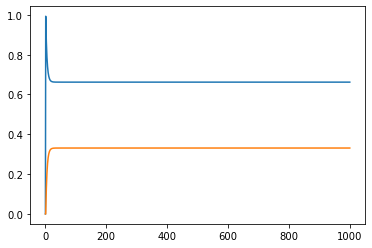

In [64]:
plt.plot(simulacion.infc_total)

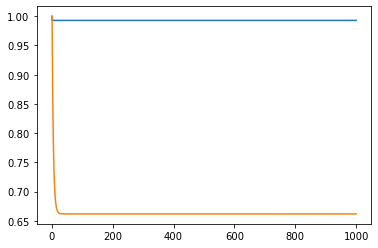

In [65]:
plt.plot(simulacion.asistencias)

In [66]:
def Informar(memoria : float, alfa_miedo : float, beta_miedo : float, beta_contagio : float, probs : list[float], prob_inicial : float, etoi : float, itos : float, info_global : bool  = True):
    print(etoi, itos, probs, prob_inicial)
    simulacion = SimulacionAgrupada(
        probs = probs,
        prob_inicial = prob_inicial,
        etoi = etoi,
        itos = itos,
        fun_miedo = gen_fun_miedo(memoria, alfa_miedo, beta_miedo),
        fun_contagio = gen_fun_contagio(beta_contagio) 
    )
    simulacion.AvanzarHastaT(500)
    fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (20,10))
    ax[0].plot(simulacion.infc_total, label = ("Expuestos", "Infectados"))
    ax[0].legend(fontsize = 20)
    ax[0].set_title("memoria = " + str(memoria) + " alfa = " + str(alfa_miedo) + " beta_miedo = " + str(beta_miedo) + " beta_contagio = " + str(beta_contagio) + " prob_inicial = " + str(prob_inicial) + f"\n etoi = {etoi} itos = {itos} info_global = {info_global}", fontsize = 20)
    ax[0].set_ylim(0,1)
    ax[1].plot(simulacion.asistencias, label = ("Valuntad de asistir","Asistencia"))
    ax[1].legend(fontsize = 20)
    ax[1].set_ylim(0,1)

    # ax[1].set_title("memoria = " + str(memoria) + " alfa = " + str(alfa_miedo) + " beta_miedo = " + str(beta_miedo) + " beta_contagio = " + str(beta_contagio) + " prob_inicial = " + str(prob_inicial) + f"\n etoi = {etoi} itos = {itos} info_global = {info_global}", fontsize = 20)
    fig.show()

0.07142857142857142 0.14285714285714285 [0.9, 0.7, 0.5, 0.3, 0.1, 0.1, 0.1, 0.1] 1e-06


/tmp/ipykernel_57475/590514705.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


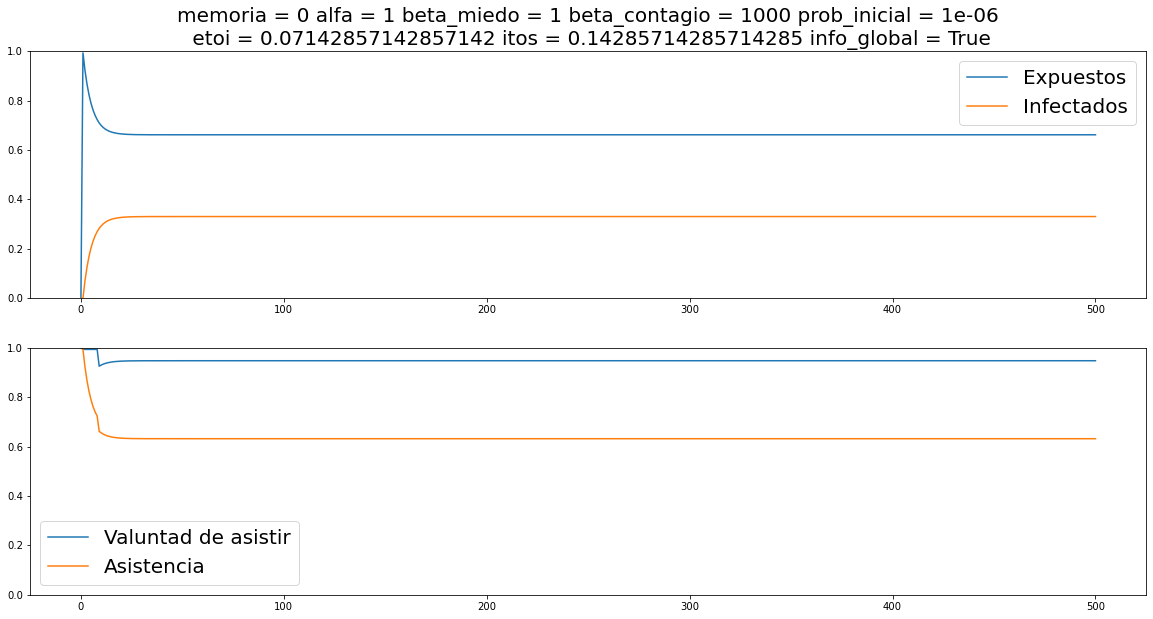

In [67]:
Informar(0, 1, 1, 1000, probs, prob_inicial, etoi, itos, True)

0.07142857142857142 0.14285714285714285 [0.9, 0.7, 0.5, 0.3, 0.1, 0.1, 0.1, 0.1] 1e-06


/tmp/ipykernel_57475/590514705.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


0.07142857142857142 0.14285714285714285 [0.9, 0.7, 0.5, 0.3, 0.1, 0.1, 0.1, 0.1] 1e-06
0.07142857142857142 0.14285714285714285 [0.9, 0.7, 0.5, 0.3, 0.1, 0.1, 0.1, 0.1] 1e-06
0.07142857142857142 0.14285714285714285 [0.9, 0.7, 0.5, 0.3, 0.1, 0.1, 0.1, 0.1] 1e-06
0.07142857142857142 0.14285714285714285 [0.9, 0.7, 0.5, 0.3, 0.1, 0.1, 0.1, 0.1] 1e-06


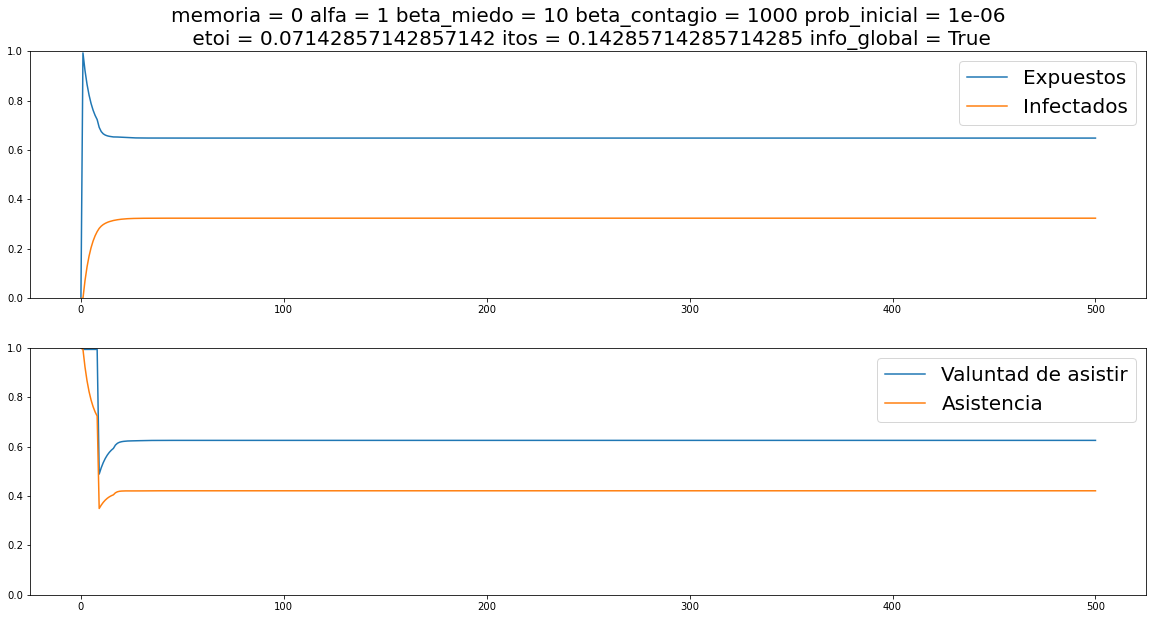

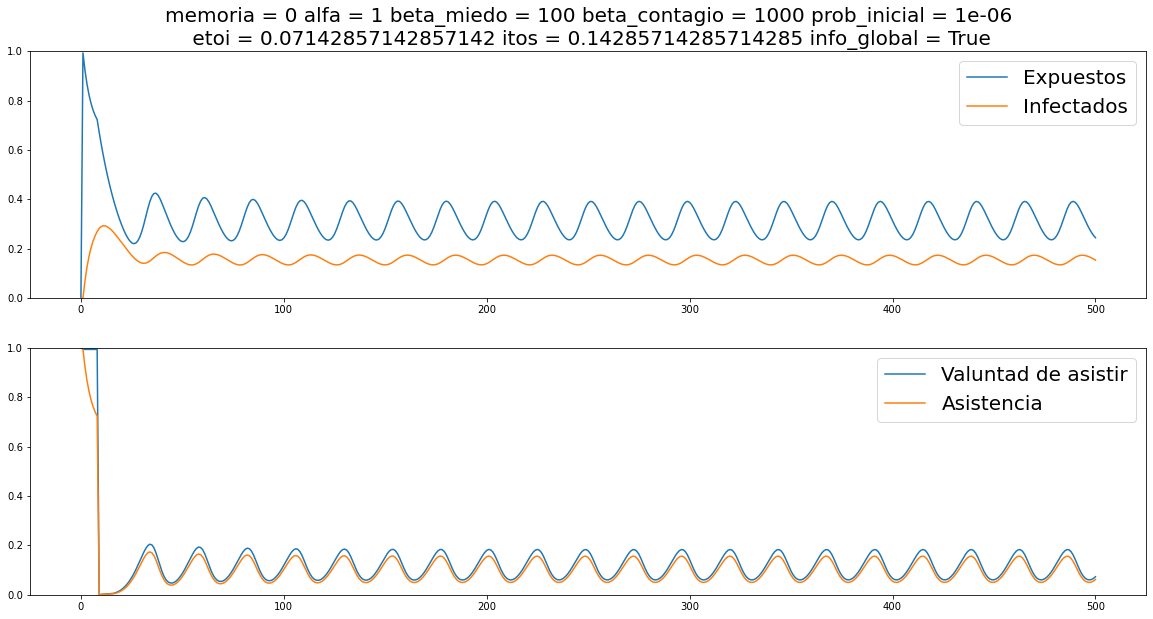

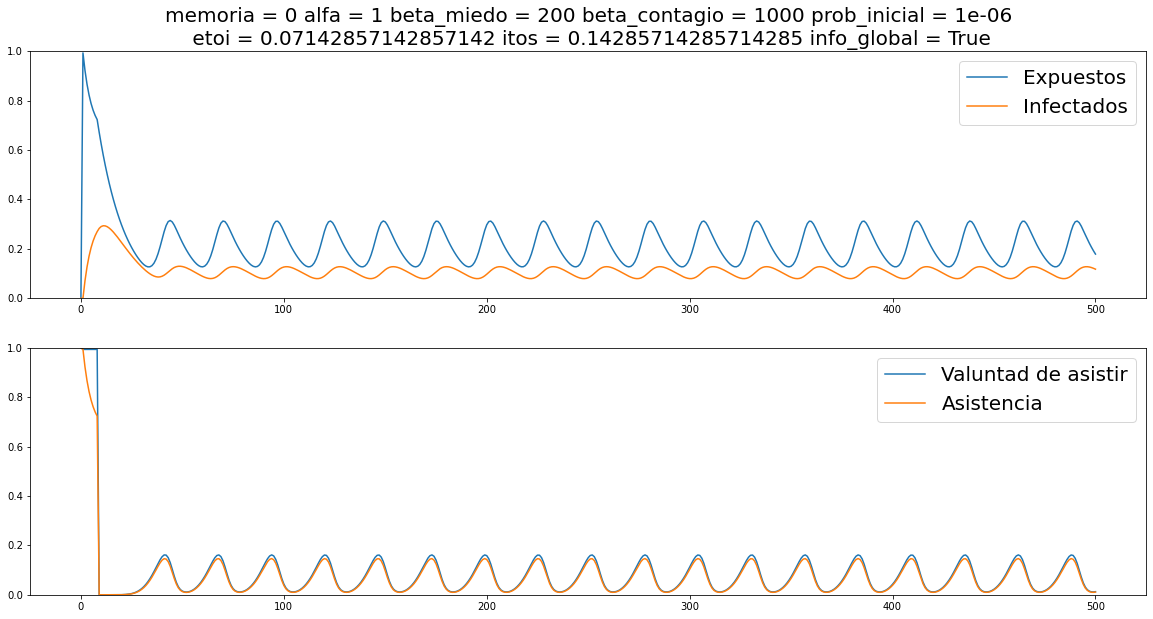

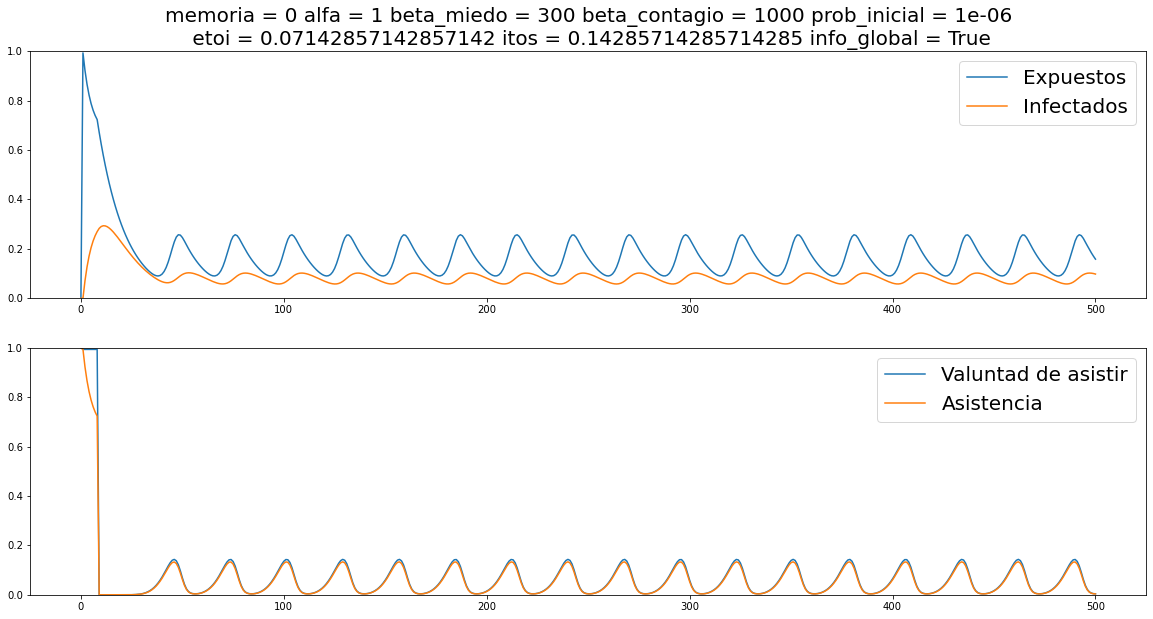

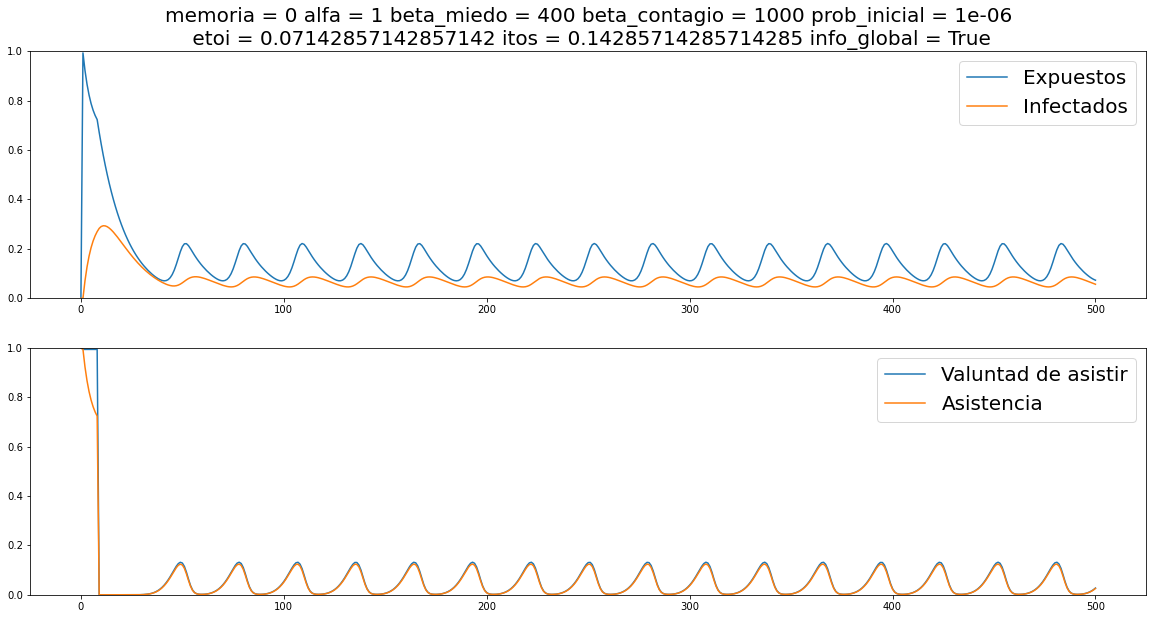

In [68]:
for beta_miedo in [10, 100, 200, 300, 400]:
    Informar(0, 1,beta_miedo, 1000, probs, prob_inicial, etoi, itos, True)

0.07142857142857142 0.14285714285714285 [0.9, 0.7, 0.5, 0.3, 0.1, 0.1, 0.1, 0.1] 1e-06


/tmp/ipykernel_57475/590514705.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


0.07142857142857142 0.14285714285714285 [0.9, 0.7, 0.5, 0.3, 0.1, 0.1, 0.1, 0.1] 1e-06
0.07142857142857142 0.14285714285714285 [0.9, 0.7, 0.5, 0.3, 0.1, 0.1, 0.1, 0.1] 1e-06
0.07142857142857142 0.14285714285714285 [0.9, 0.7, 0.5, 0.3, 0.1, 0.1, 0.1, 0.1] 1e-06
0.07142857142857142 0.14285714285714285 [0.9, 0.7, 0.5, 0.3, 0.1, 0.1, 0.1, 0.1] 1e-06
0.07142857142857142 0.14285714285714285 [0.9, 0.7, 0.5, 0.3, 0.1, 0.1, 0.1, 0.1] 1e-06
0.07142857142857142 0.14285714285714285 [0.9, 0.7, 0.5, 0.3, 0.1, 0.1, 0.1, 0.1] 1e-06


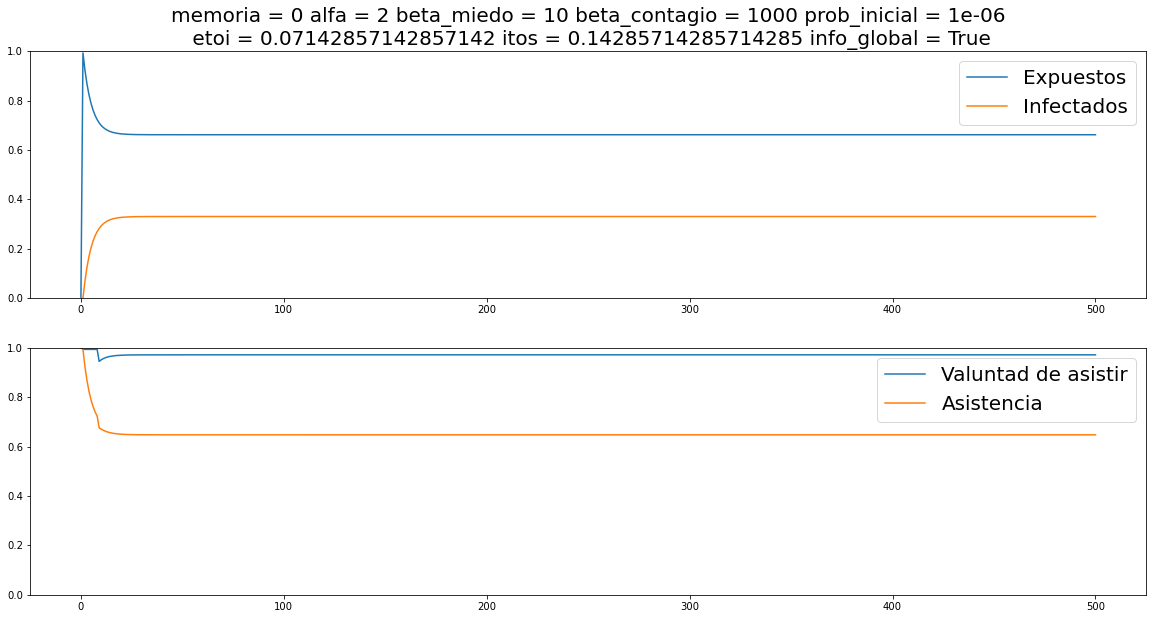

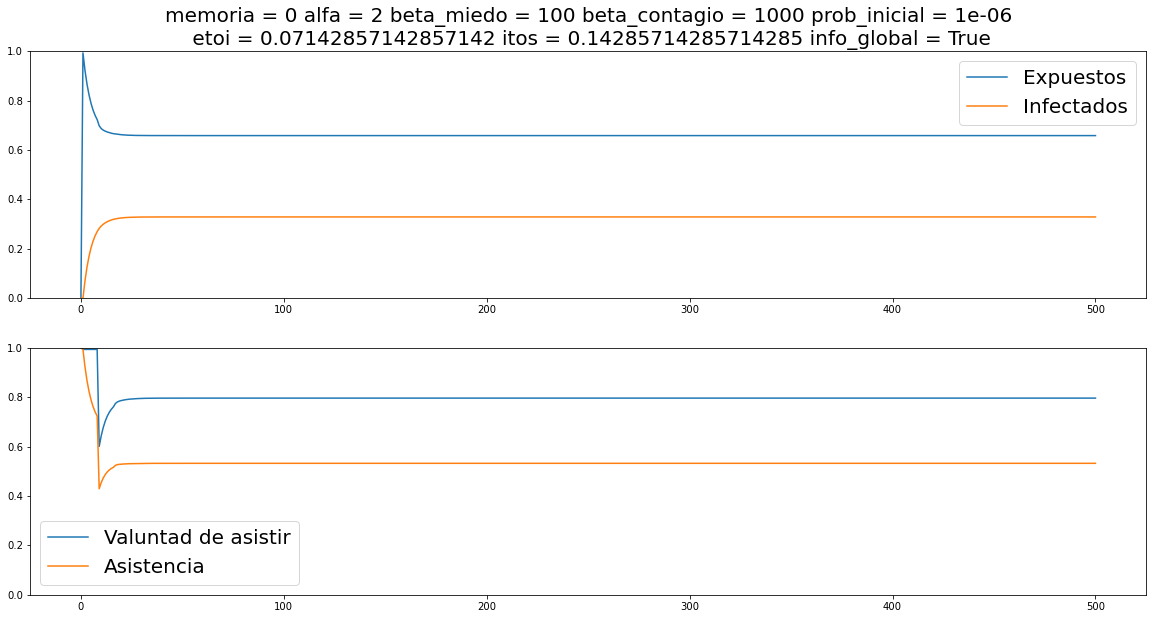

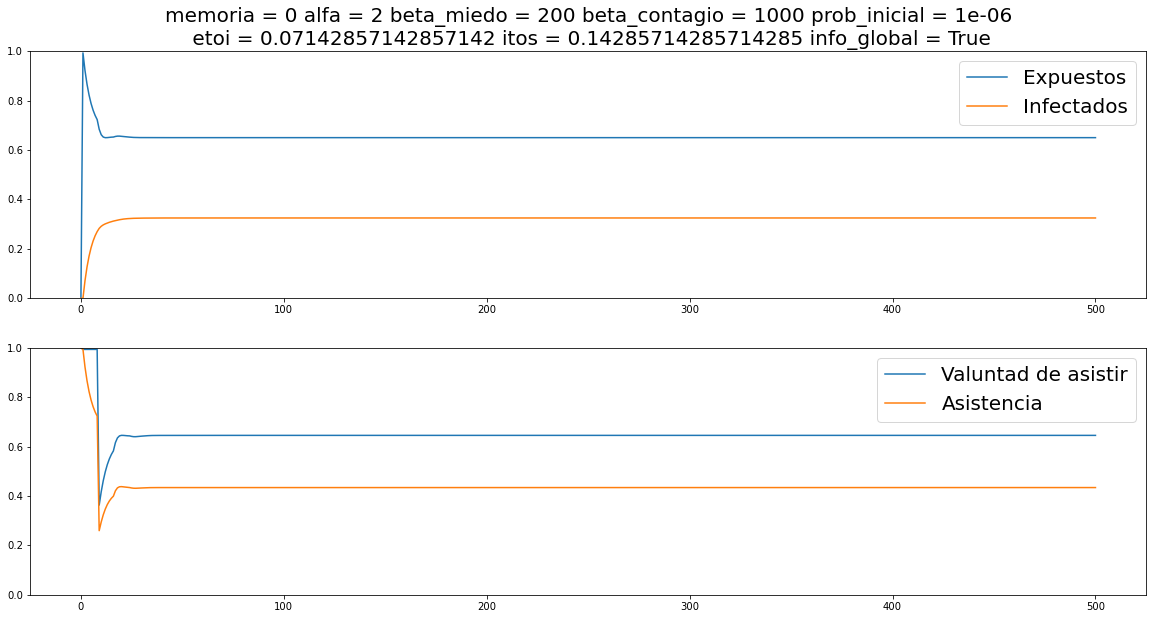

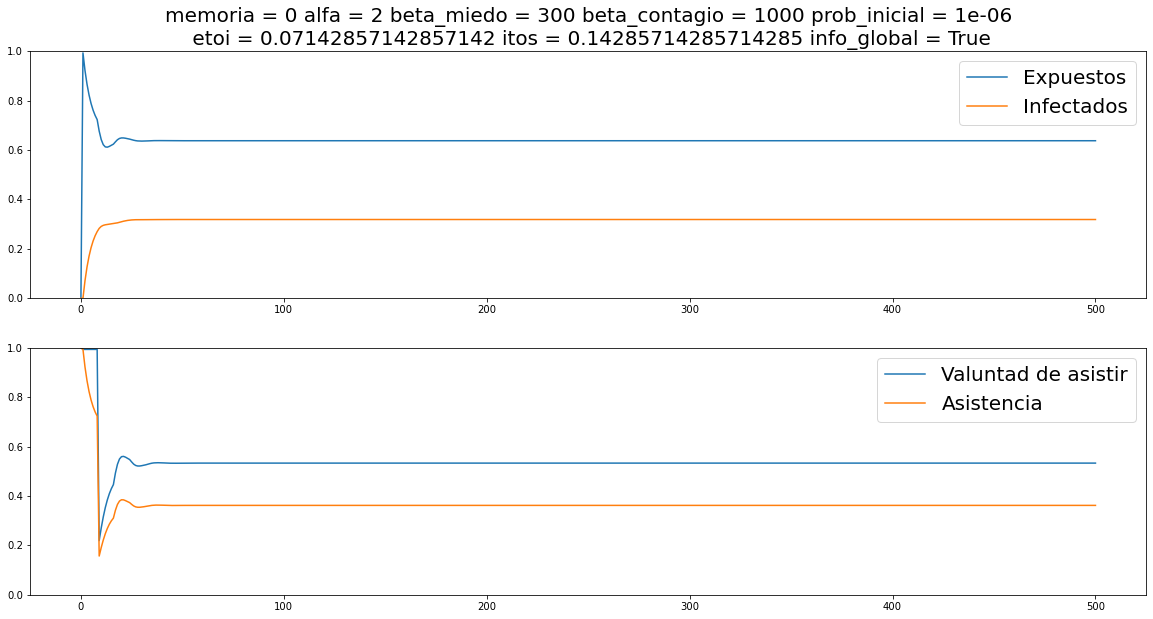

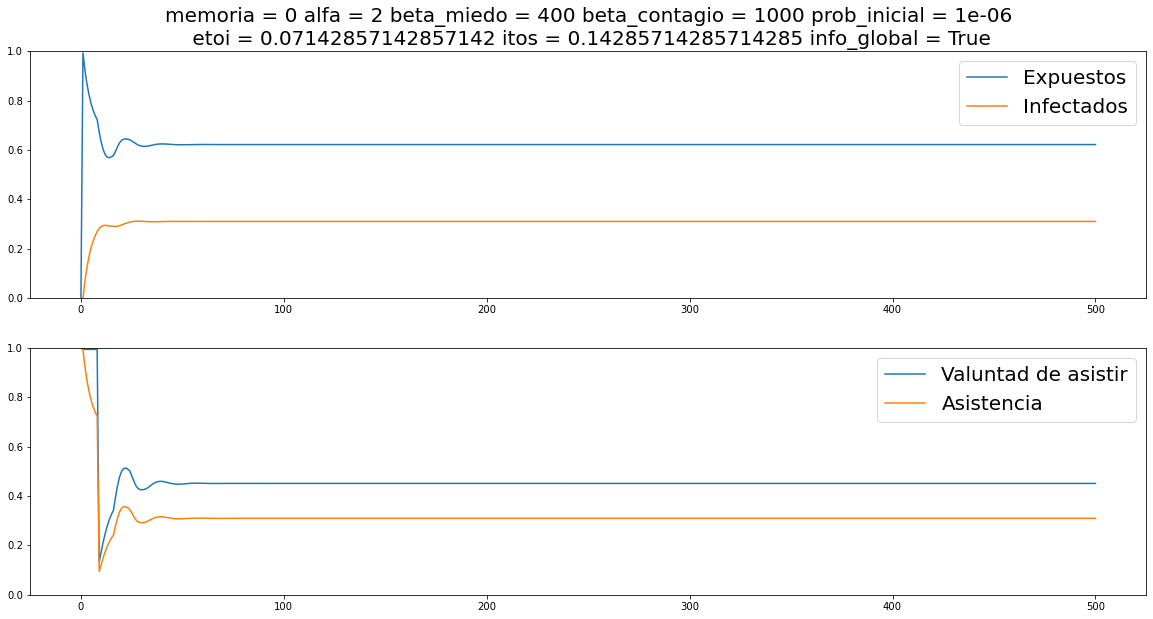

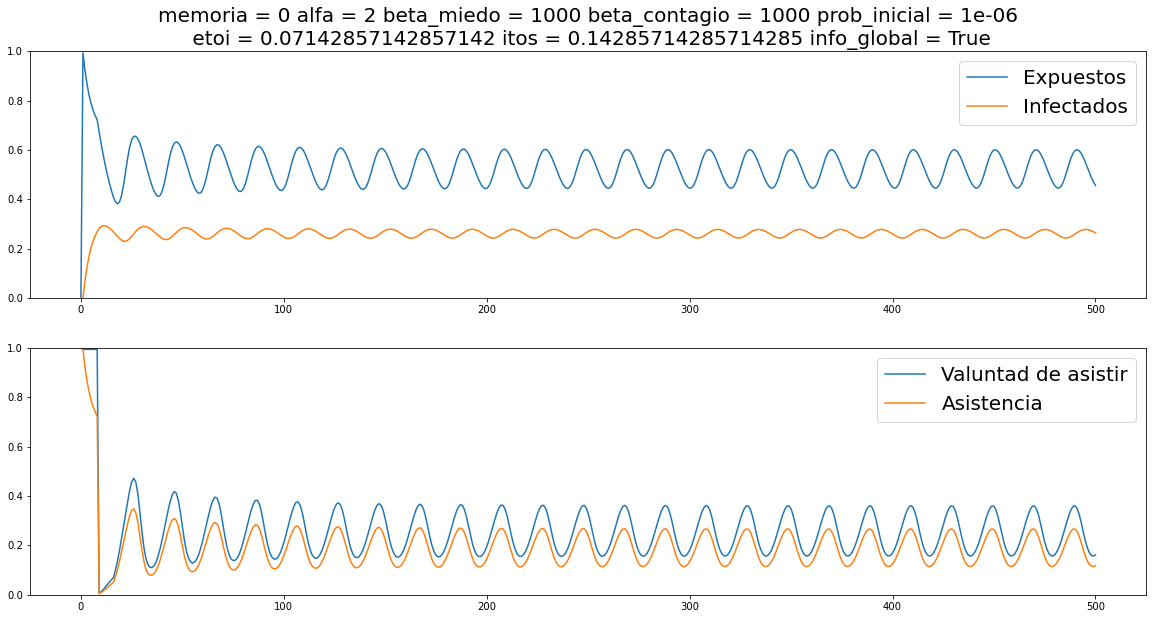

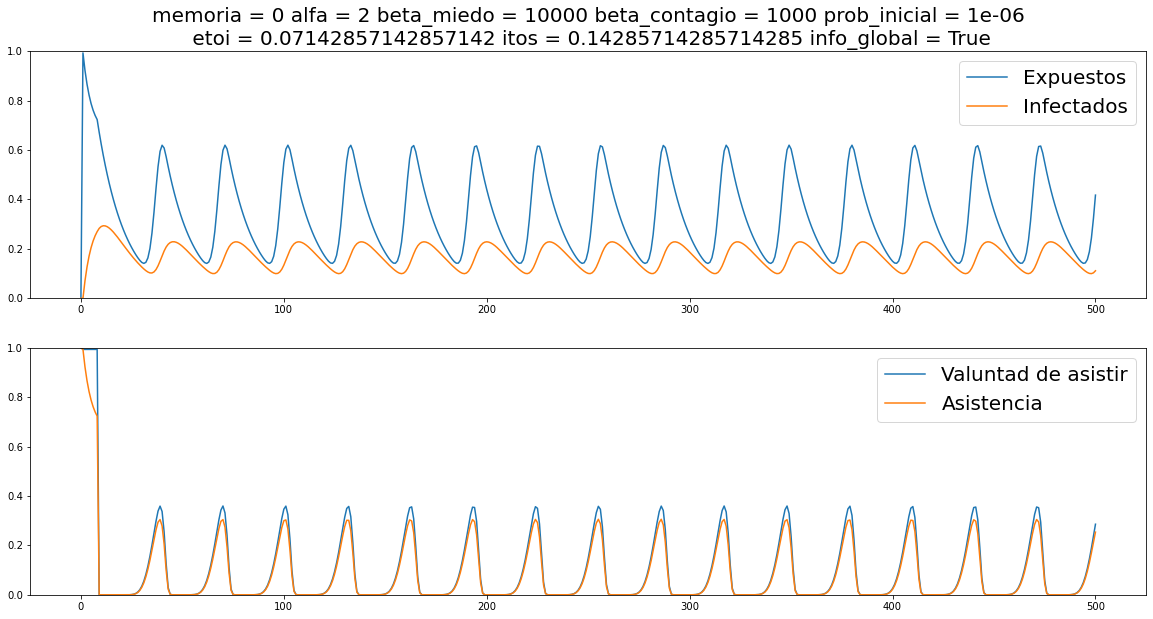

In [69]:
for beta_miedo in [10, 100, 200, 300, 400, 1000, 10000]:
    Informar(0, 2,beta_miedo, 1000, probs, prob_inicial, etoi, itos, True)

0.07142857142857142 0.14285714285714285 [0.9, 0.7, 0.5, 0.3, 0.1, 0.1, 0.1, 0.1] 1e-06


/tmp/ipykernel_57475/590514705.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


0.07142857142857142 0.14285714285714285 [0.9, 0.7, 0.5, 0.3, 0.1, 0.1, 0.1, 0.1] 1e-06
0.07142857142857142 0.14285714285714285 [0.9, 0.7, 0.5, 0.3, 0.1, 0.1, 0.1, 0.1] 1e-06
0.07142857142857142 0.14285714285714285 [0.9, 0.7, 0.5, 0.3, 0.1, 0.1, 0.1, 0.1] 1e-06
0.07142857142857142 0.14285714285714285 [0.9, 0.7, 0.5, 0.3, 0.1, 0.1, 0.1, 0.1] 1e-06
0.07142857142857142 0.14285714285714285 [0.9, 0.7, 0.5, 0.3, 0.1, 0.1, 0.1, 0.1] 1e-06
0.07142857142857142 0.14285714285714285 [0.9, 0.7, 0.5, 0.3, 0.1, 0.1, 0.1, 0.1] 1e-06


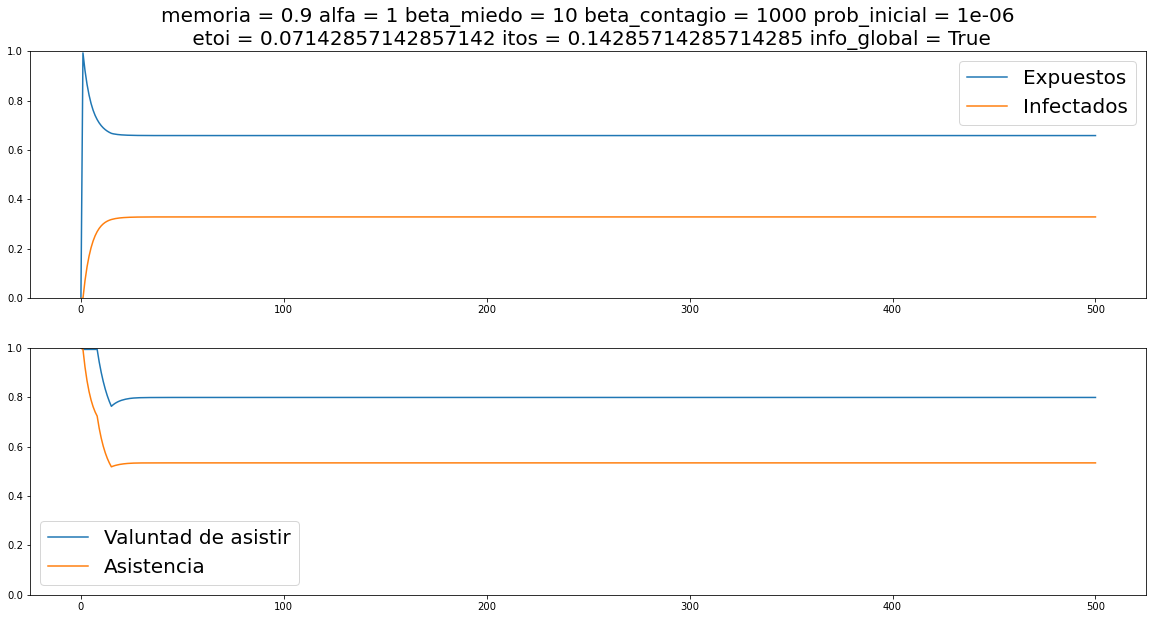

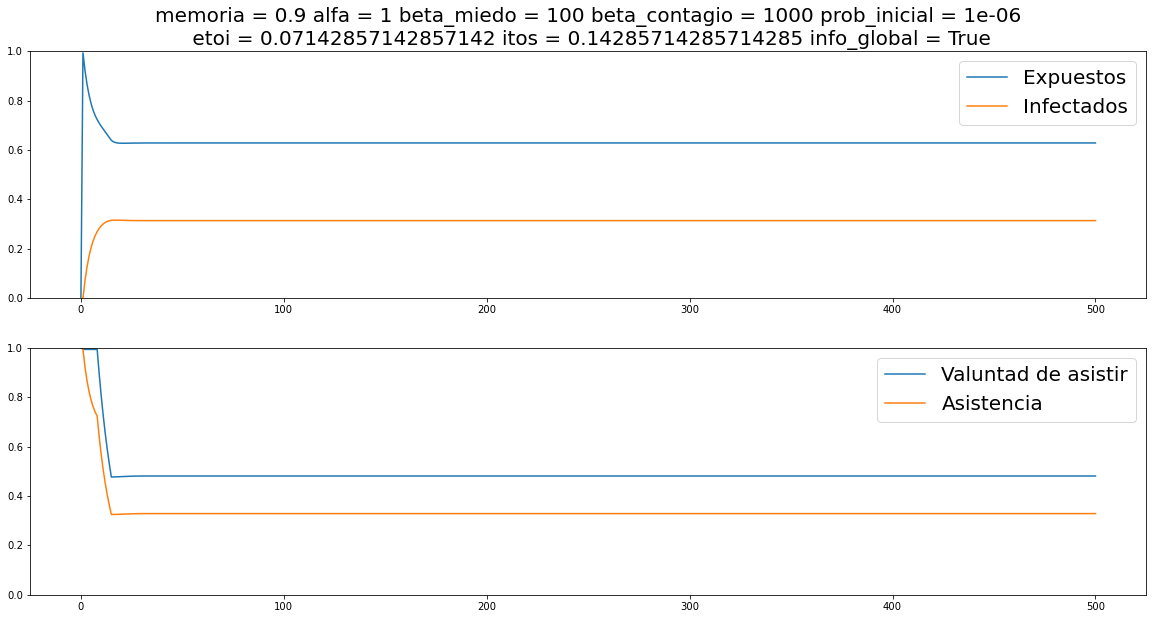

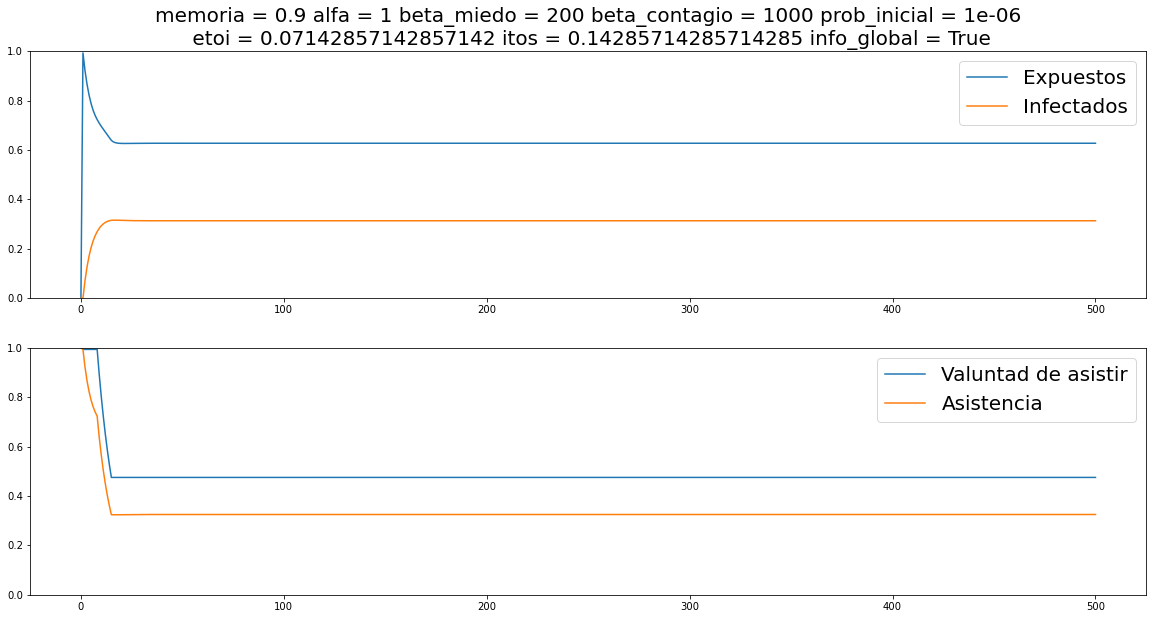

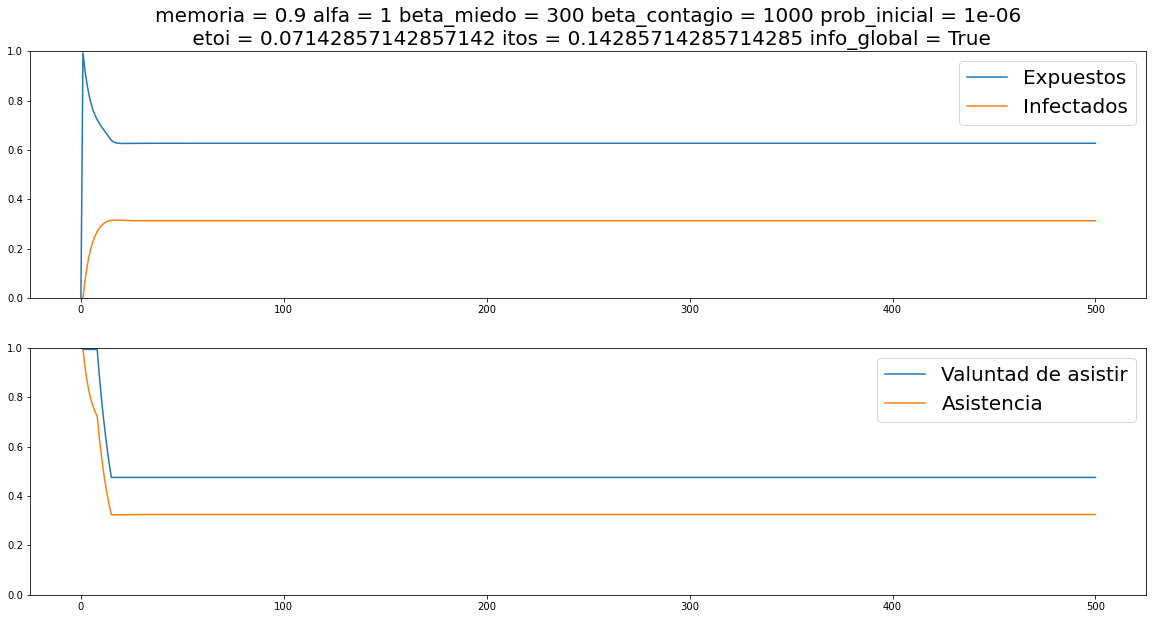

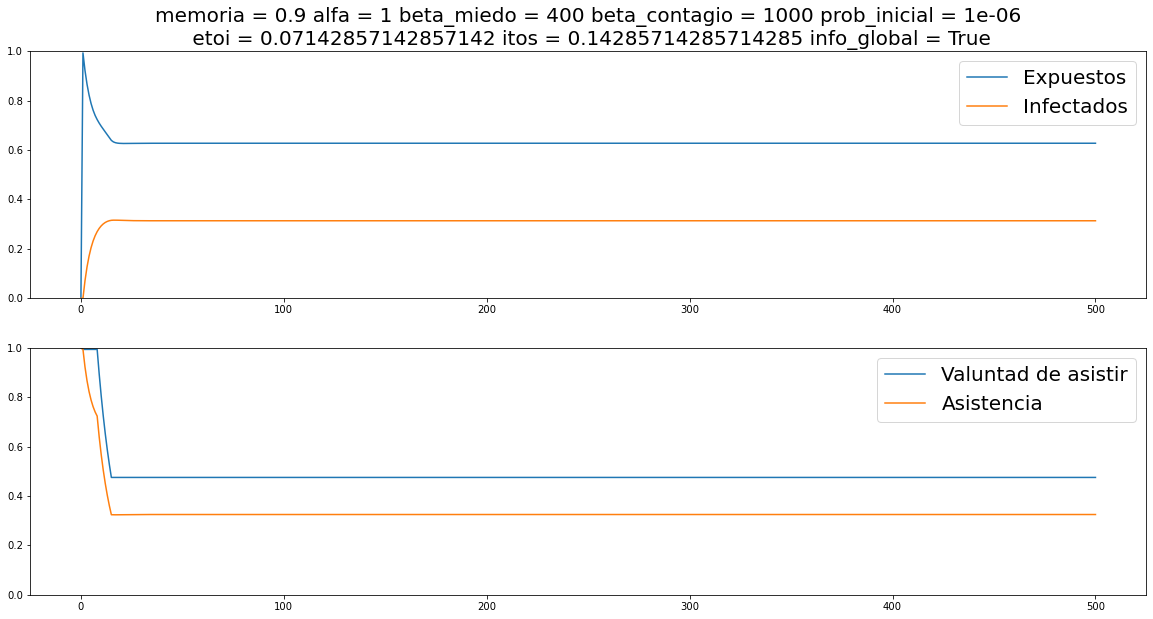

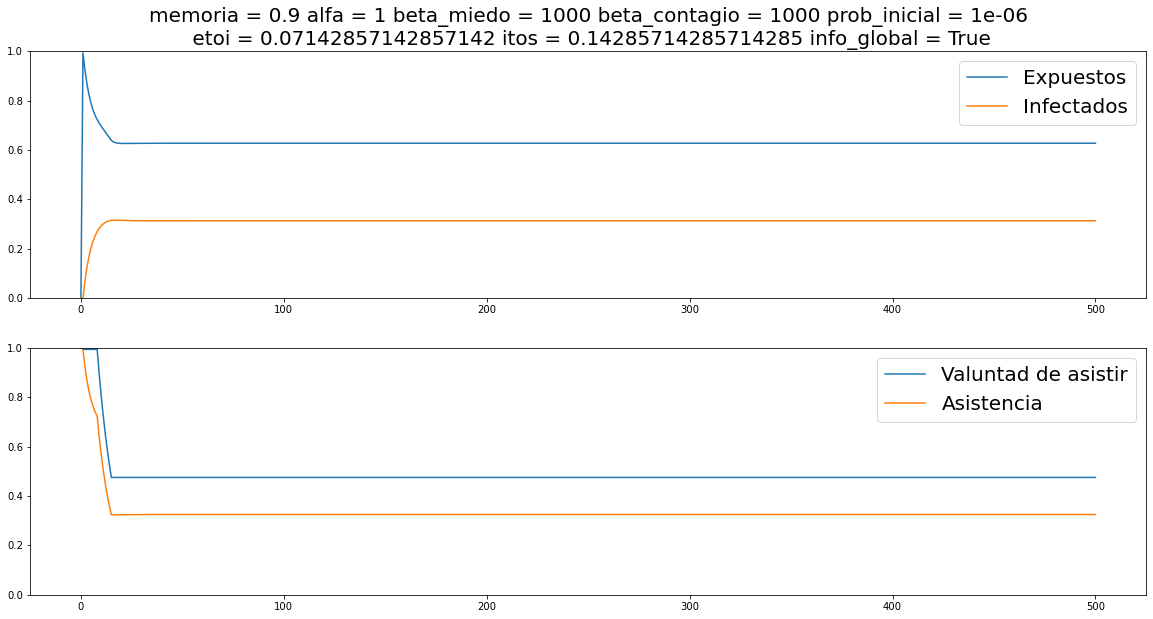

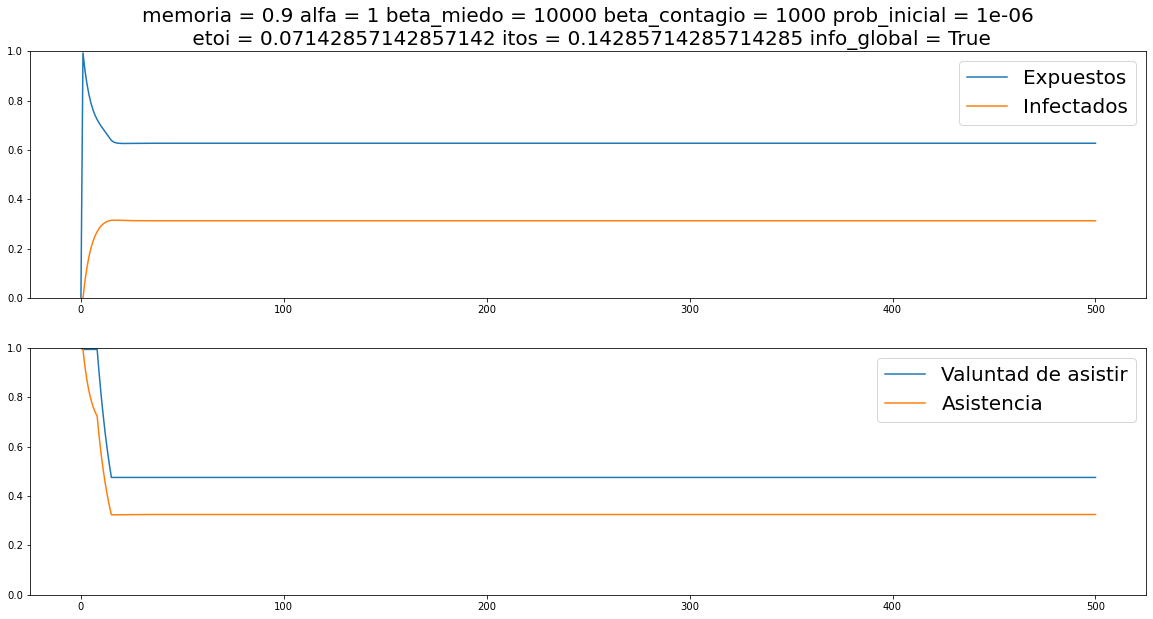

In [70]:
for beta_miedo in [10, 100, 200, 300, 400, 1000, 10000]:
    Informar(0.9, 1,beta_miedo, 1000, probs, prob_inicial, etoi, itos, True)

0.07142857142857142 0.14285714285714285 [0.9, 0.7, 0.5, 0.3, 0.1, 0.1, 0.1, 0.1] 1e-06


/tmp/ipykernel_57475/590514705.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


0.07142857142857142 0.14285714285714285 [0.9, 0.7, 0.5, 0.3, 0.1, 0.1, 0.1, 0.1] 1e-06
0.07142857142857142 0.14285714285714285 [0.9, 0.7, 0.5, 0.3, 0.1, 0.1, 0.1, 0.1] 1e-06
0.07142857142857142 0.14285714285714285 [0.9, 0.7, 0.5, 0.3, 0.1, 0.1, 0.1, 0.1] 1e-06
0.07142857142857142 0.14285714285714285 [0.9, 0.7, 0.5, 0.3, 0.1, 0.1, 0.1, 0.1] 1e-06
0.07142857142857142 0.14285714285714285 [0.9, 0.7, 0.5, 0.3, 0.1, 0.1, 0.1, 0.1] 1e-06
0.07142857142857142 0.14285714285714285 [0.9, 0.7, 0.5, 0.3, 0.1, 0.1, 0.1, 0.1] 1e-06
0.07142857142857142 0.14285714285714285 [0.9, 0.7, 0.5, 0.3, 0.1, 0.1, 0.1, 0.1] 1e-06


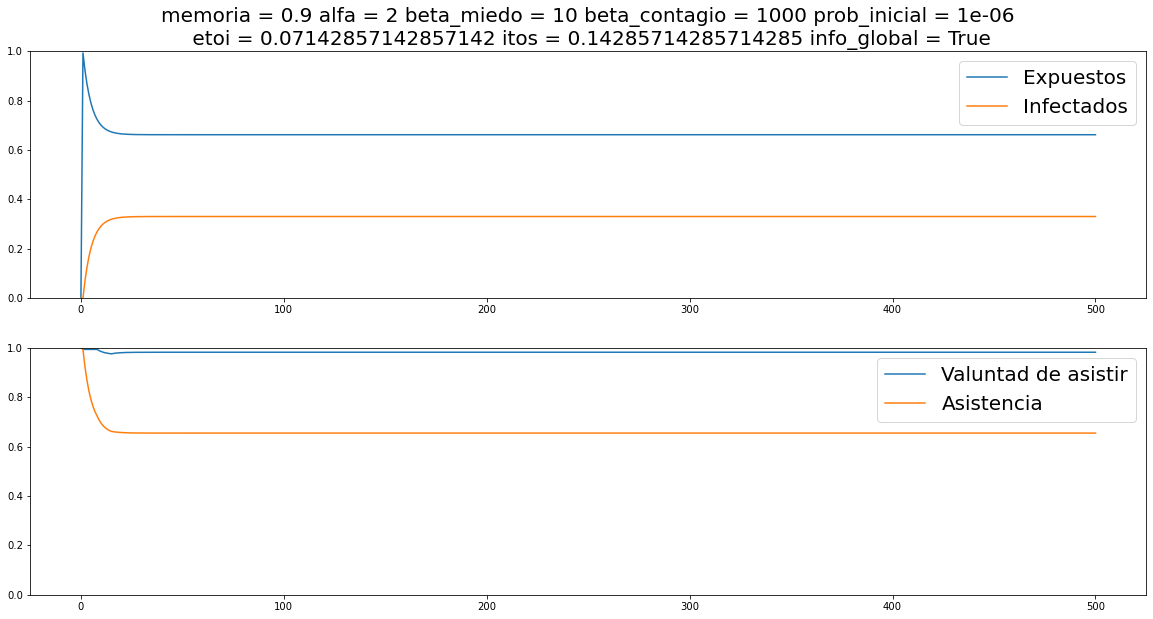

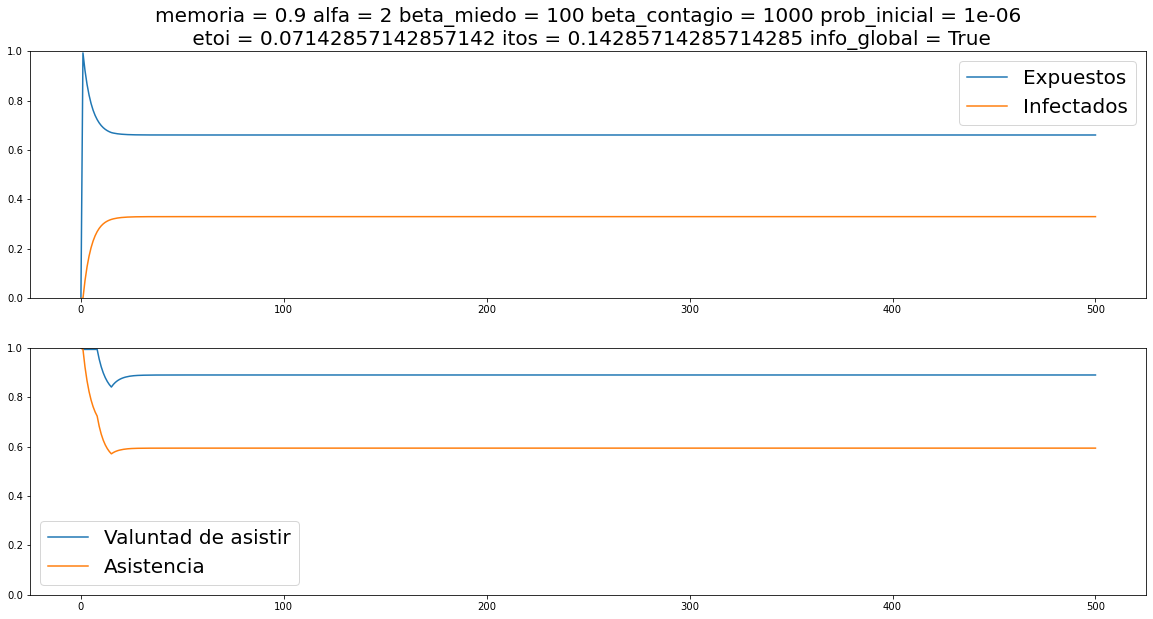

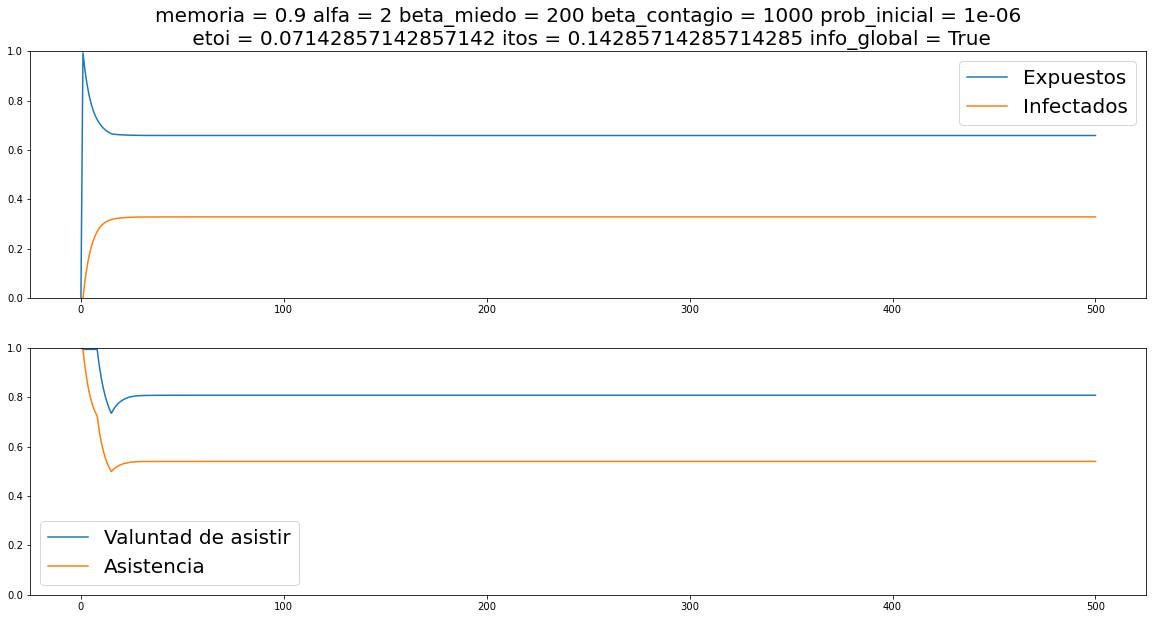

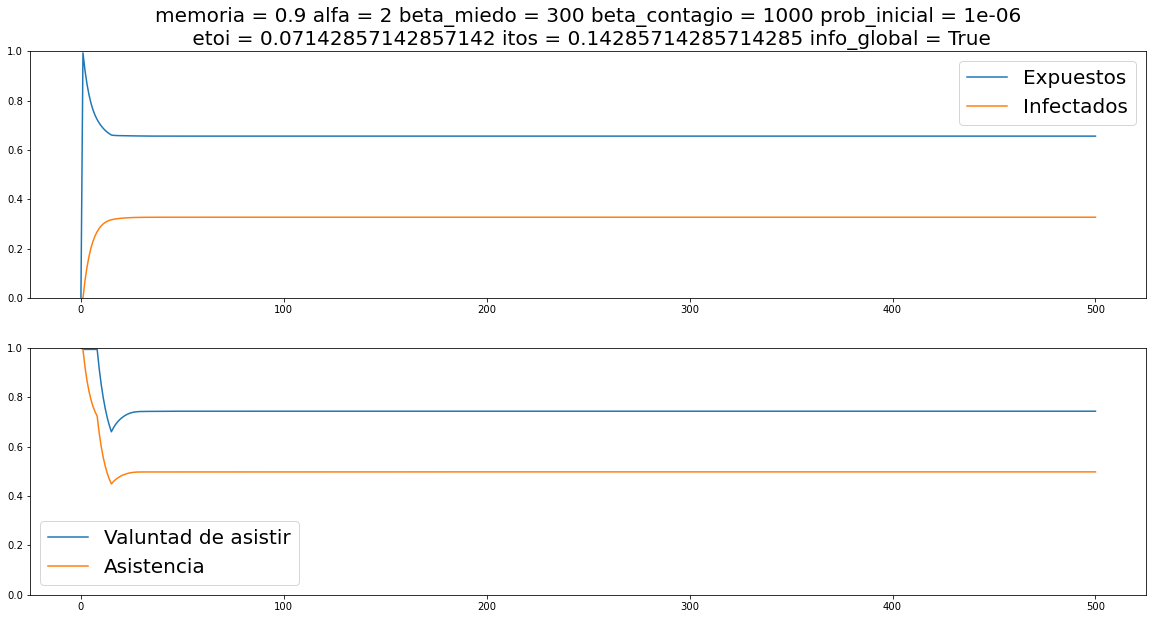

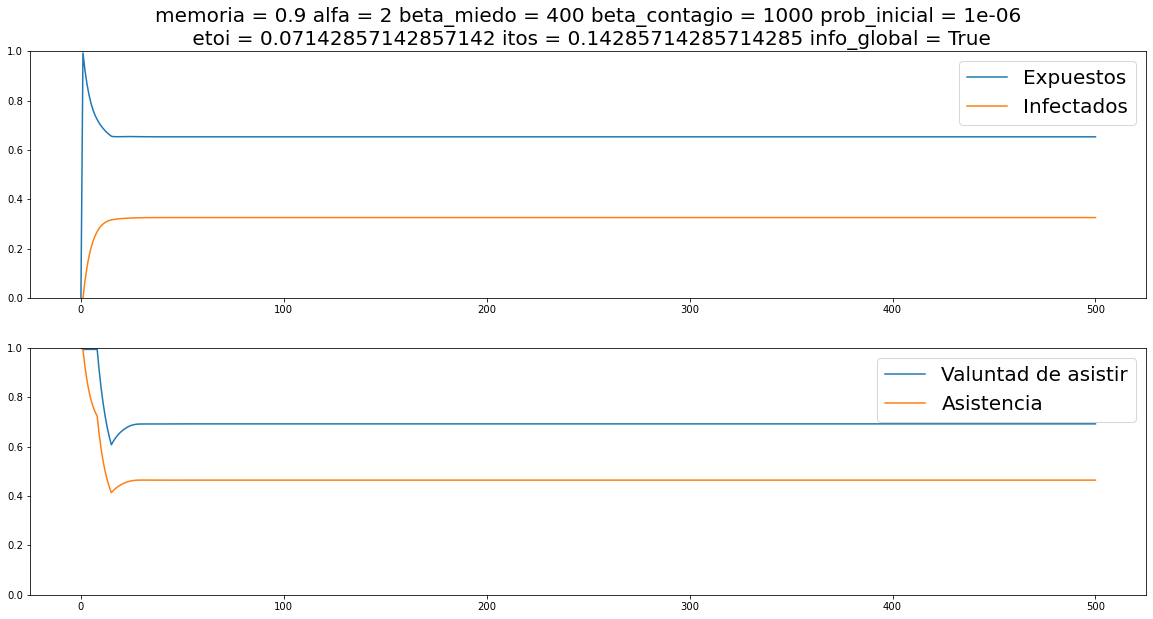

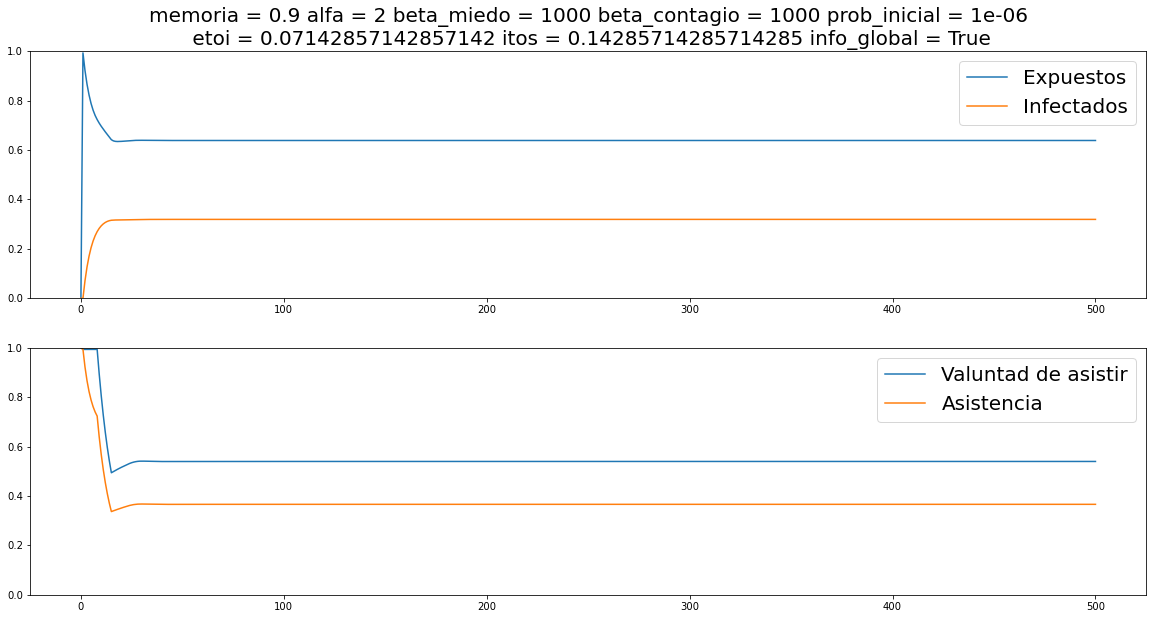

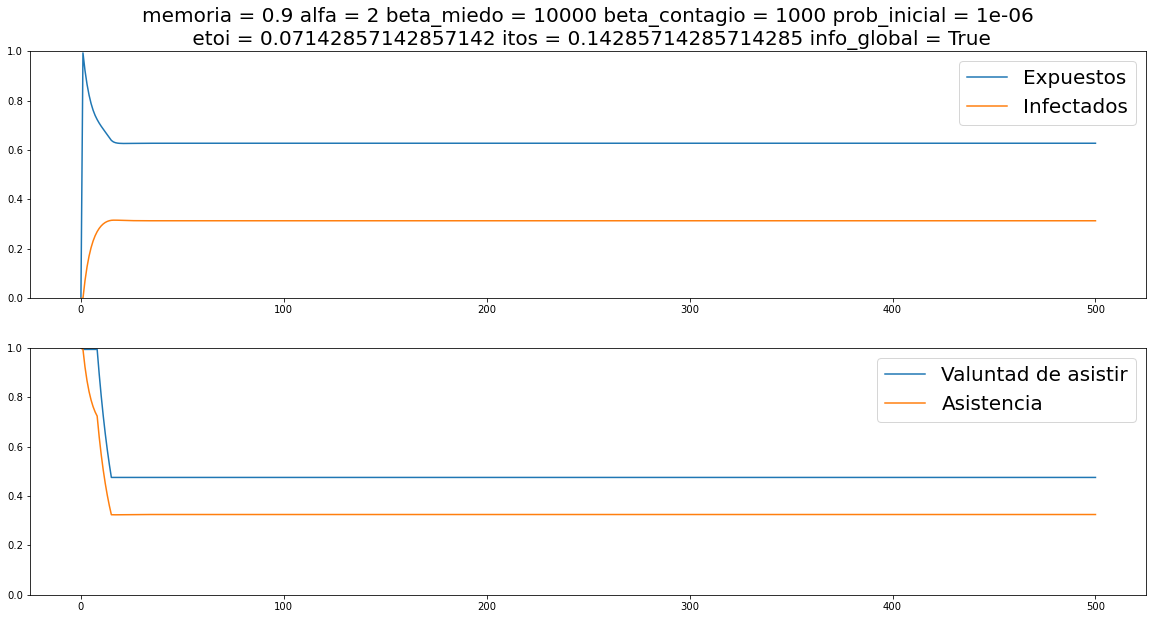

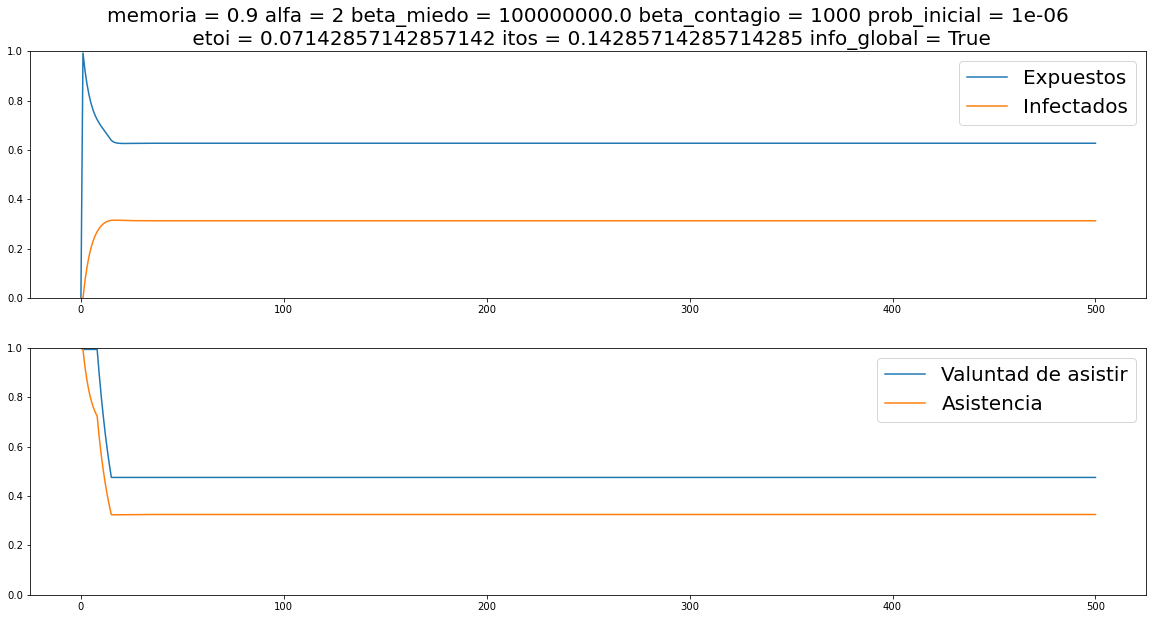

In [71]:
for beta_miedo in [10, 100, 200, 300, 400, 1000, 10000, 1e8]:
    Informar(0.9, 2,beta_miedo, 1000, probs, prob_inicial, etoi, itos, True)

0.07142857142857142 0.14285714285714285 [0.9, 0.7, 0.5, 0.3, 0.1, 0.1, 0.1, 0.1] 1e-06


/tmp/ipykernel_57475/590514705.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


0.07142857142857142 0.14285714285714285 [0.9, 0.7, 0.5, 0.3, 0.1, 0.1, 0.1, 0.1] 1e-06
0.07142857142857142 0.14285714285714285 [0.9, 0.7, 0.5, 0.3, 0.1, 0.1, 0.1, 0.1] 1e-06
0.07142857142857142 0.14285714285714285 [0.9, 0.7, 0.5, 0.3, 0.1, 0.1, 0.1, 0.1] 1e-06
0.07142857142857142 0.14285714285714285 [0.9, 0.7, 0.5, 0.3, 0.1, 0.1, 0.1, 0.1] 1e-06
0.07142857142857142 0.14285714285714285 [0.9, 0.7, 0.5, 0.3, 0.1, 0.1, 0.1, 0.1] 1e-06
0.07142857142857142 0.14285714285714285 [0.9, 0.7, 0.5, 0.3, 0.1, 0.1, 0.1, 0.1] 1e-06


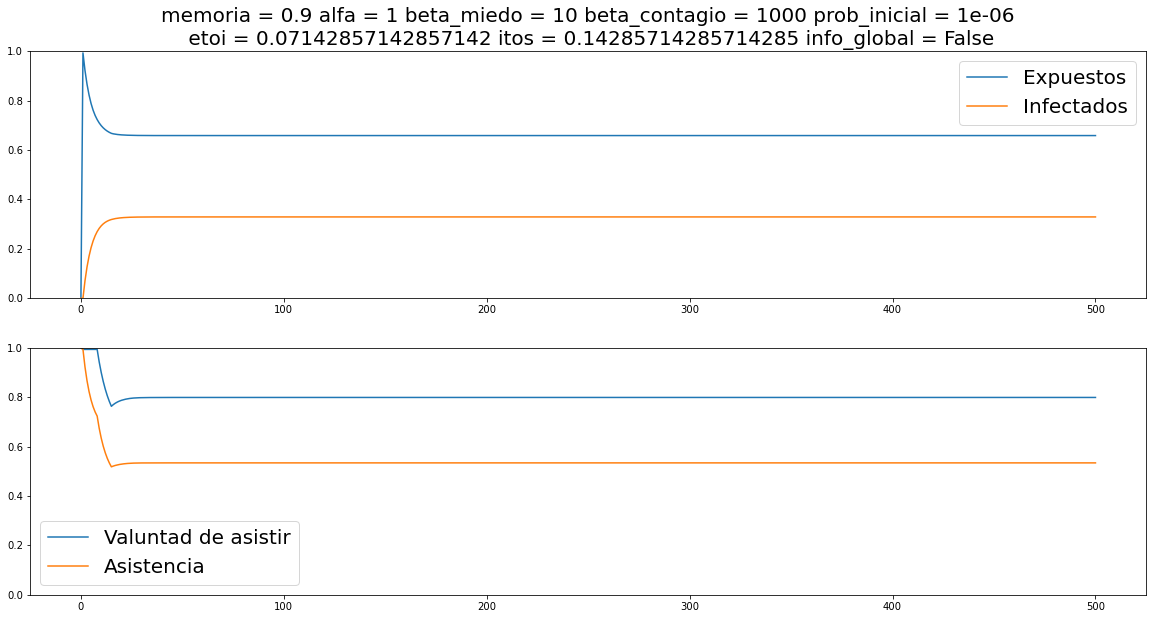

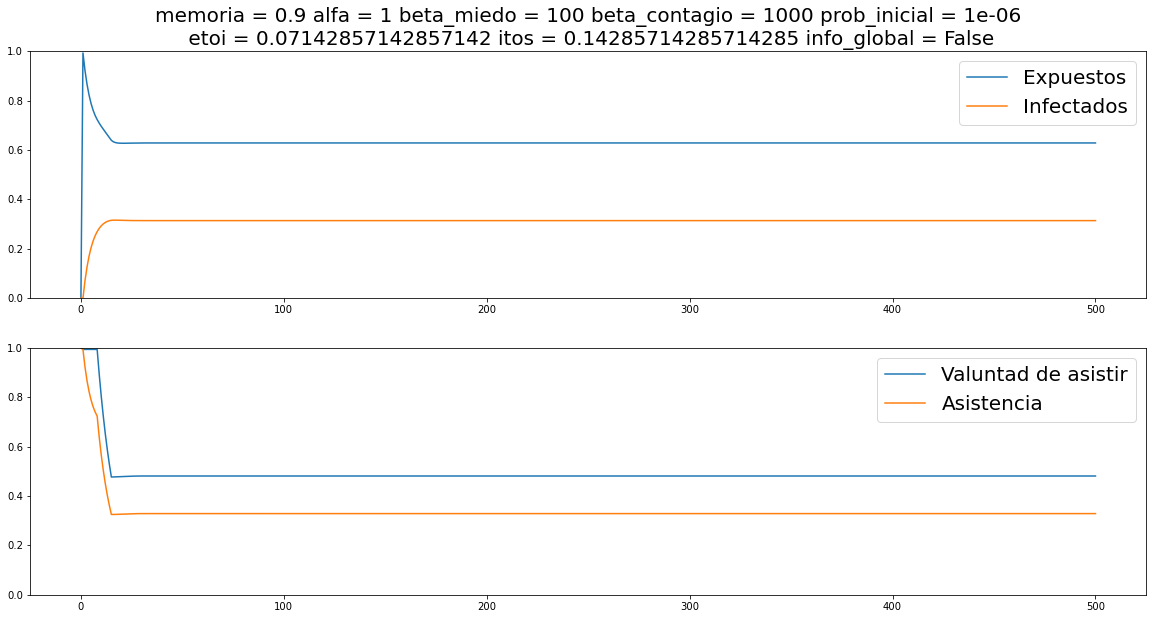

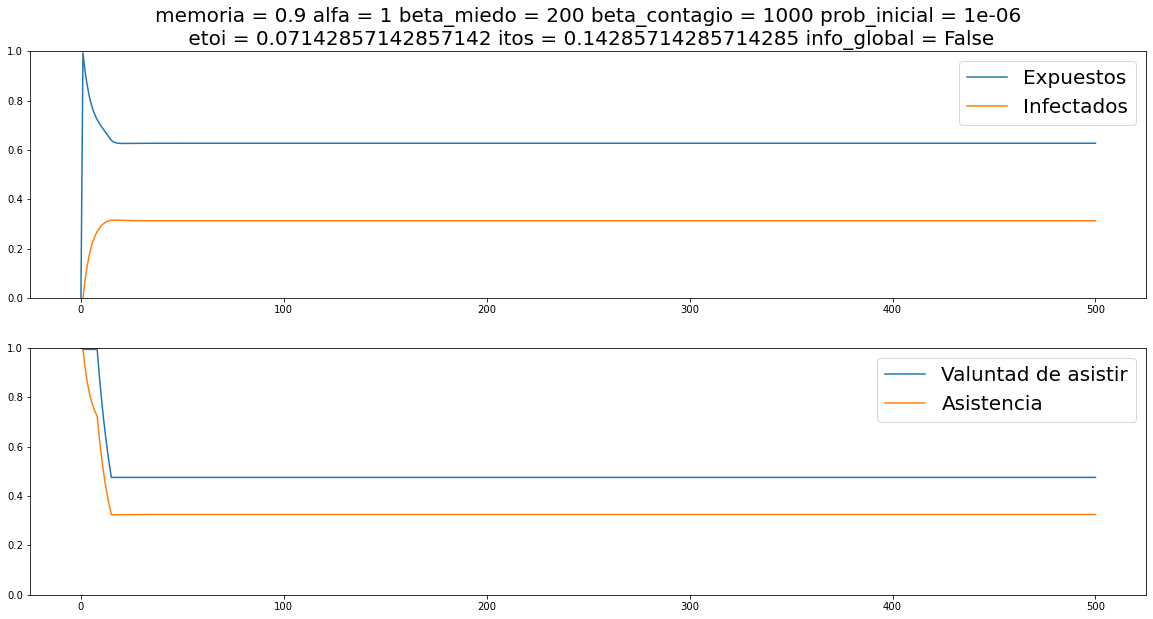

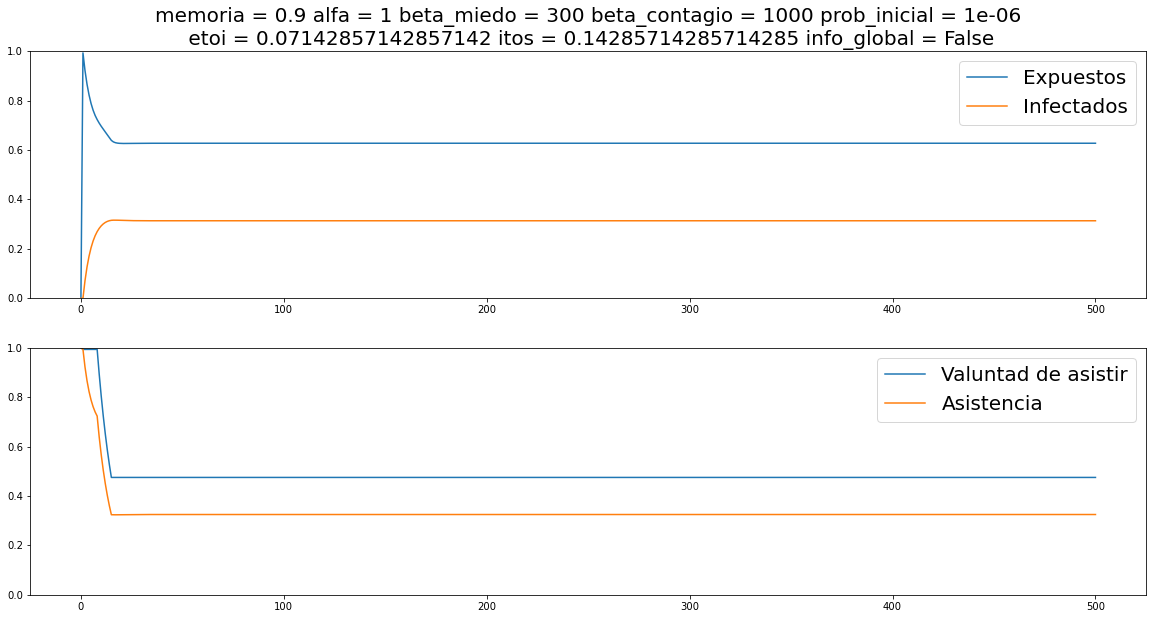

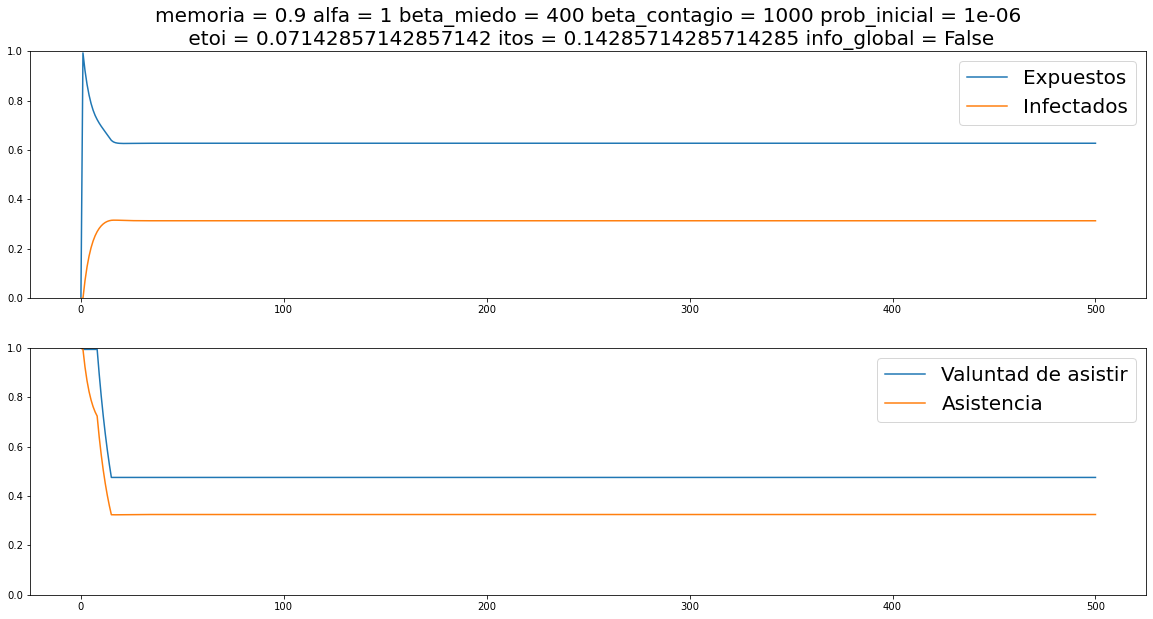

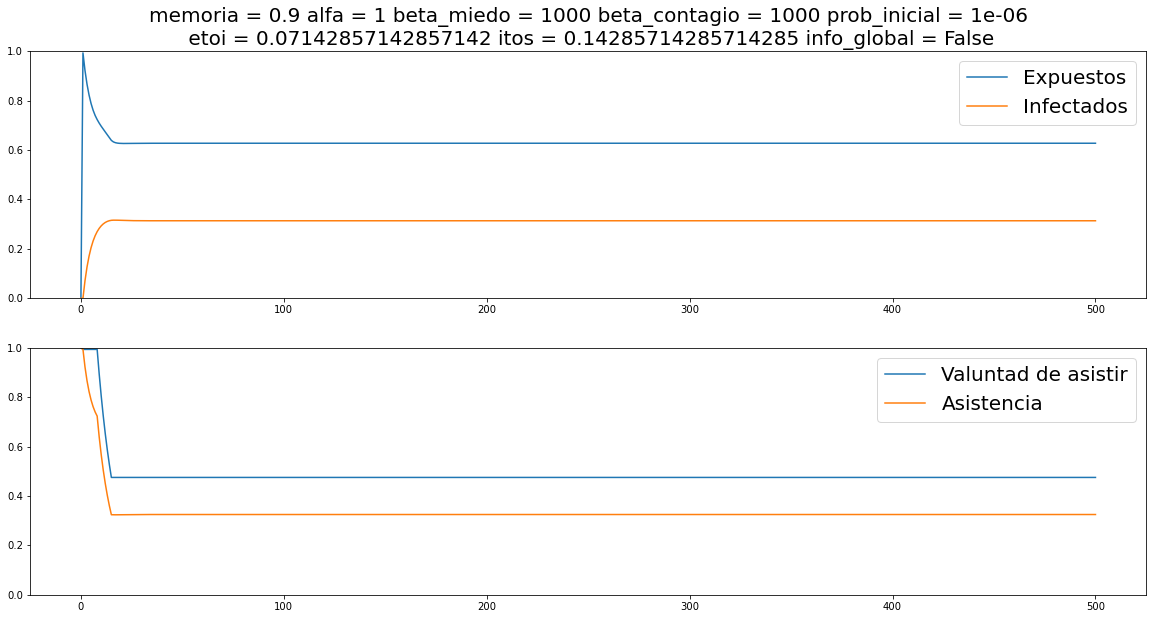

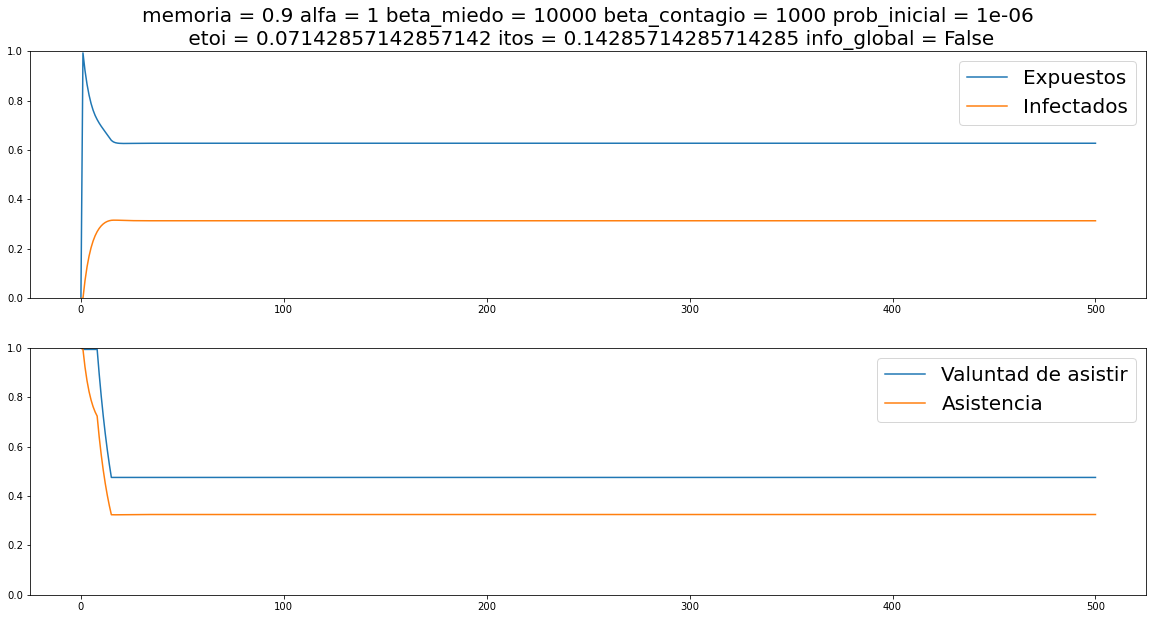

In [72]:
for beta_miedo in [10, 100, 200, 300, 400, 1000, 10000]:
    Informar(0.9, 1,beta_miedo, 1000, probs, prob_inicial, etoi, itos, False)

0.07142857142857142 0.14285714285714285 [0.9, 0.7, 0.5, 0.3, 0.1, 0.1, 0.1, 0.1] 1e-06


/tmp/ipykernel_57475/590514705.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


0.07142857142857142 0.14285714285714285 [0.9, 0.7, 0.5, 0.3, 0.1, 0.1, 0.1, 0.1] 1e-06
0.07142857142857142 0.14285714285714285 [0.9, 0.7, 0.5, 0.3, 0.1, 0.1, 0.1, 0.1] 1e-06
0.07142857142857142 0.14285714285714285 [0.9, 0.7, 0.5, 0.3, 0.1, 0.1, 0.1, 0.1] 1e-06
0.07142857142857142 0.14285714285714285 [0.9, 0.7, 0.5, 0.3, 0.1, 0.1, 0.1, 0.1] 1e-06
0.07142857142857142 0.14285714285714285 [0.9, 0.7, 0.5, 0.3, 0.1, 0.1, 0.1, 0.1] 1e-06
0.07142857142857142 0.14285714285714285 [0.9, 0.7, 0.5, 0.3, 0.1, 0.1, 0.1, 0.1] 1e-06


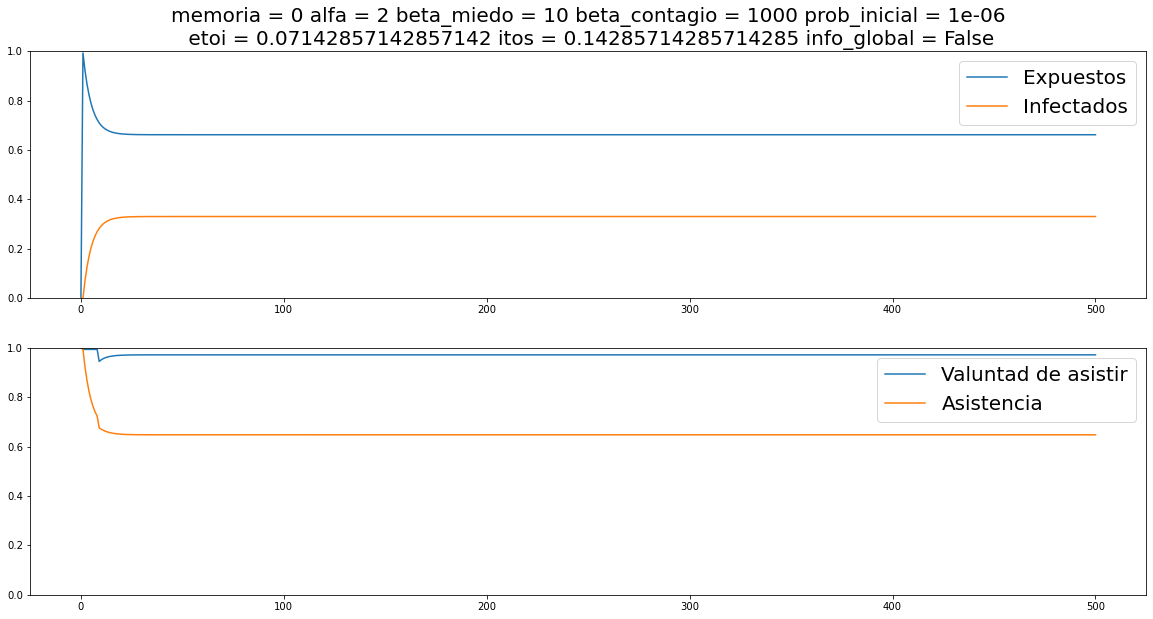

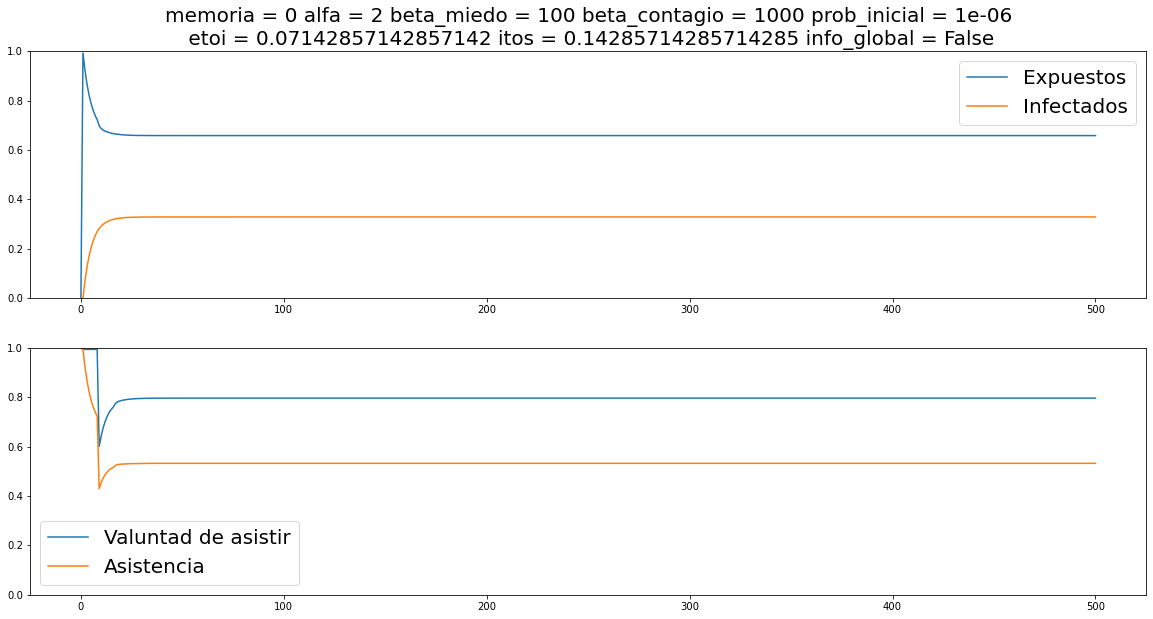

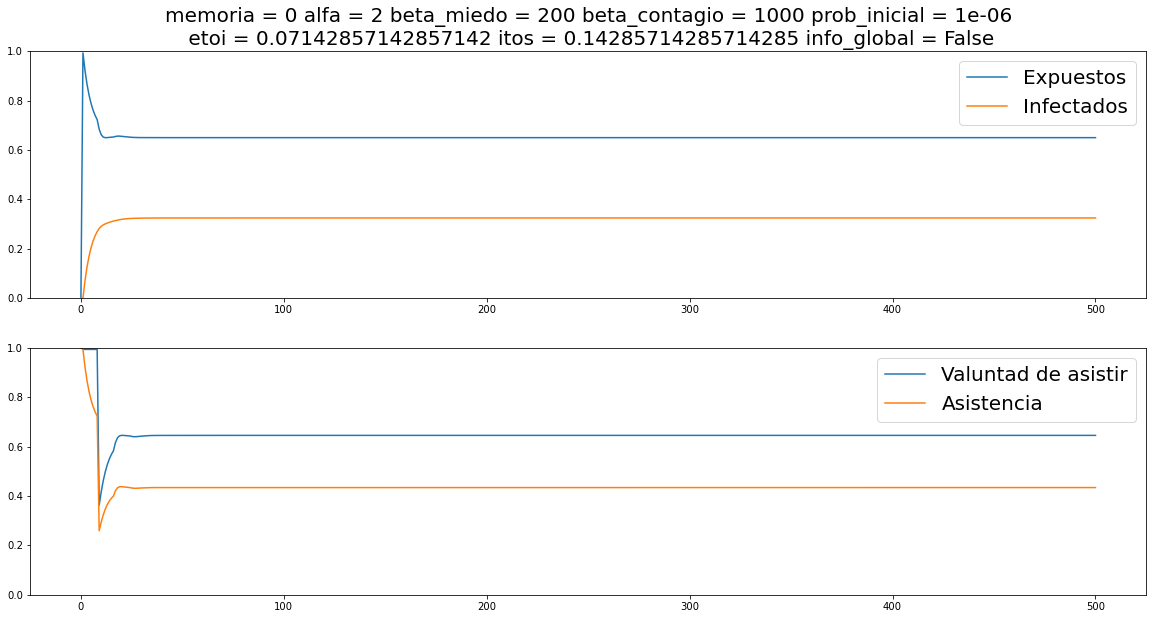

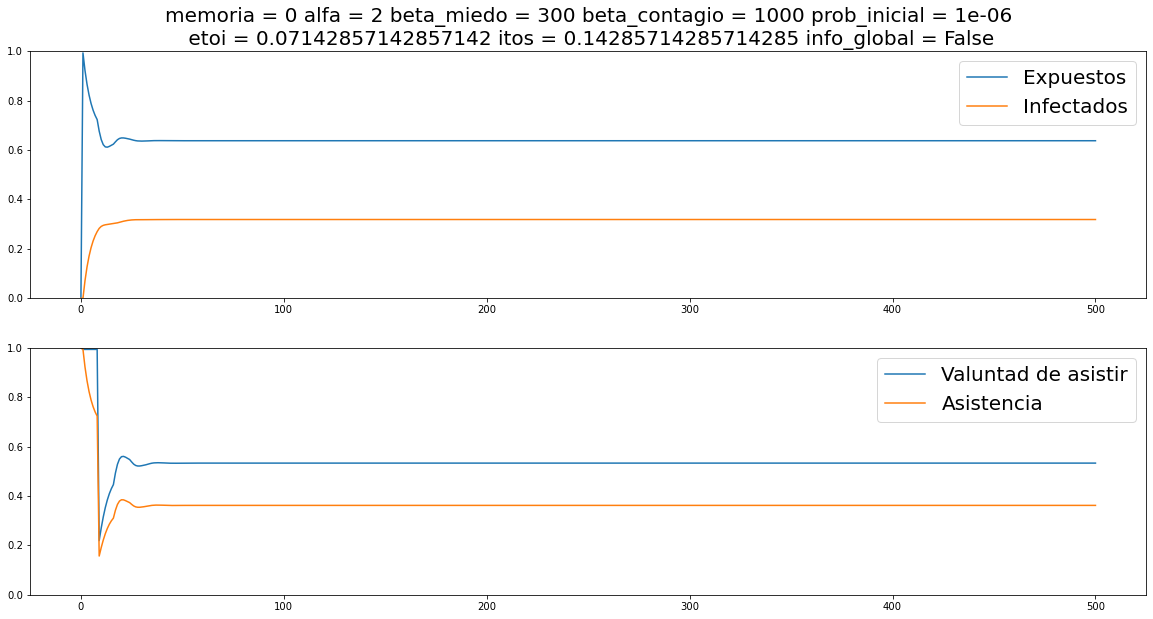

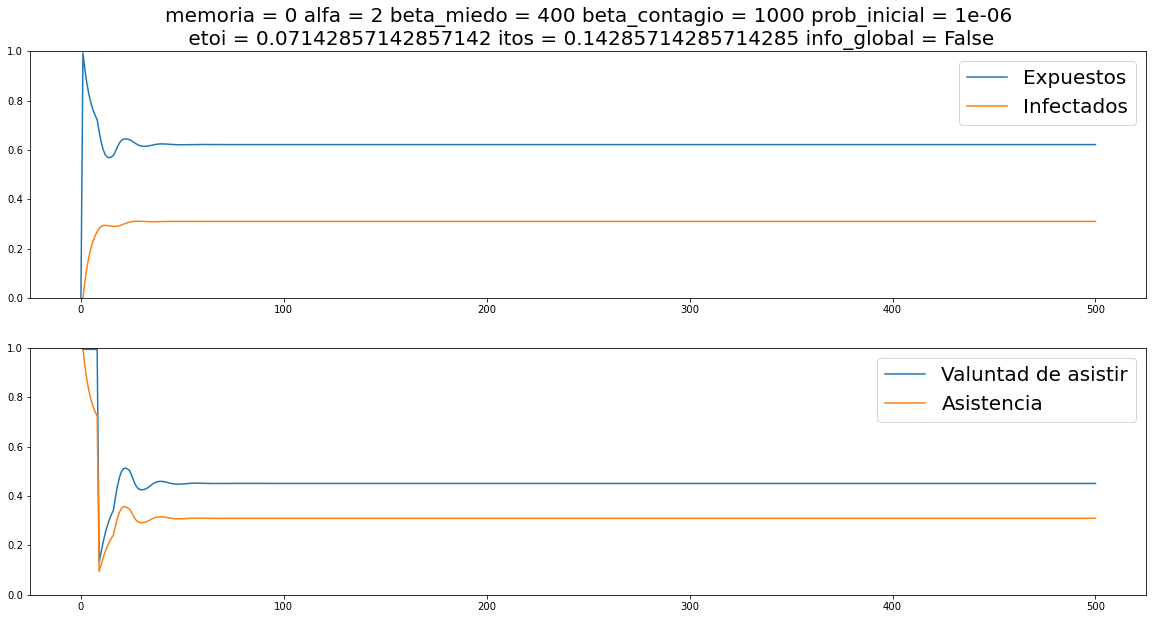

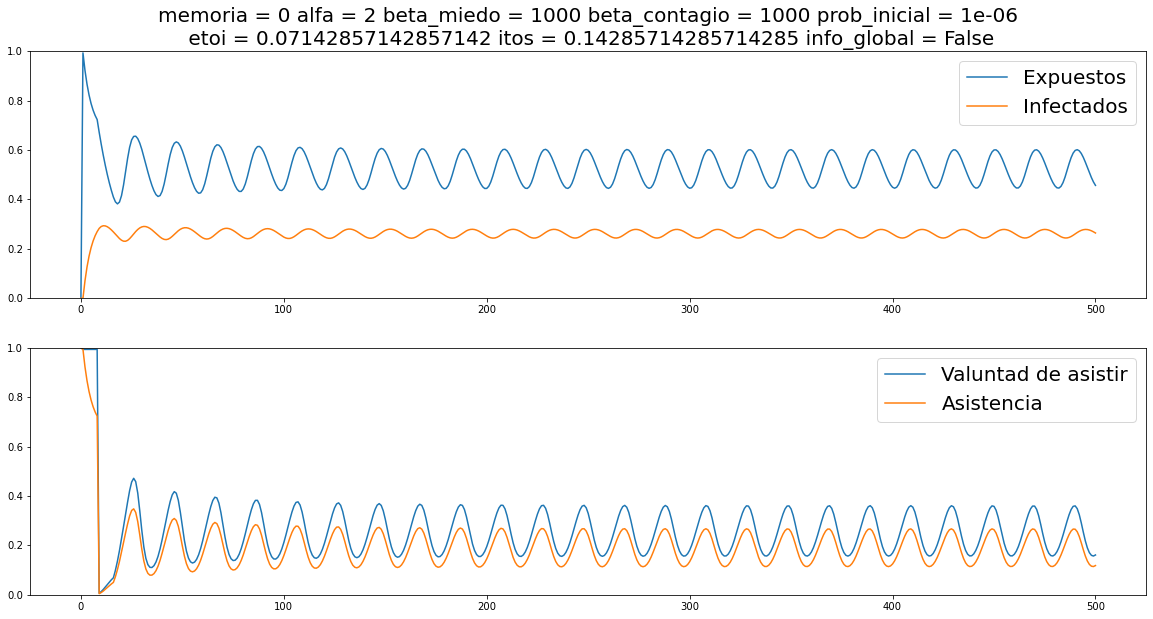

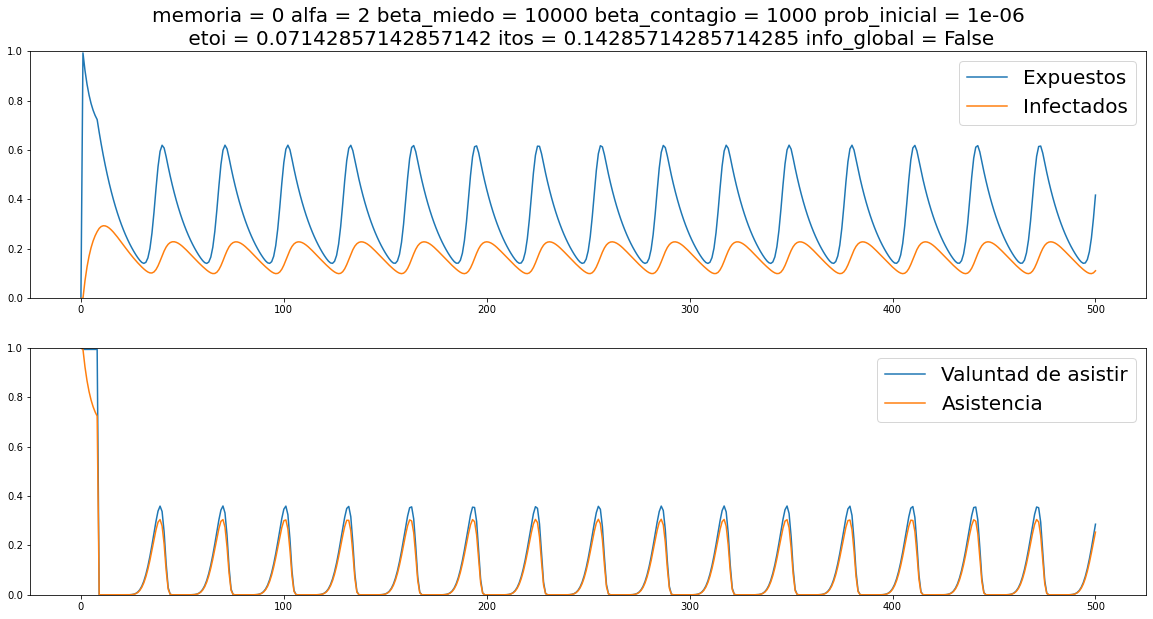

In [73]:
for beta_miedo in [10, 100, 200, 300, 400, 1000, 10000]:
    Informar(0, 2,beta_miedo, 1000, probs, prob_inicial, etoi, itos, False)

0.07142857142857142 0.14285714285714285 [0.9, 0.7, 0.5, 0.3, 0.1, 0.1, 0.1, 0.1] 1e-06


/tmp/ipykernel_57475/590514705.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


0.07142857142857142 0.14285714285714285 [0.9, 0.7, 0.5, 0.3, 0.1, 0.1, 0.1, 0.1] 1e-06
0.07142857142857142 0.14285714285714285 [0.9, 0.7, 0.5, 0.3, 0.1, 0.1, 0.1, 0.1] 1e-06
0.07142857142857142 0.14285714285714285 [0.9, 0.7, 0.5, 0.3, 0.1, 0.1, 0.1, 0.1] 1e-06
0.07142857142857142 0.14285714285714285 [0.9, 0.7, 0.5, 0.3, 0.1, 0.1, 0.1, 0.1] 1e-06
0.07142857142857142 0.14285714285714285 [0.9, 0.7, 0.5, 0.3, 0.1, 0.1, 0.1, 0.1] 1e-06
0.07142857142857142 0.14285714285714285 [0.9, 0.7, 0.5, 0.3, 0.1, 0.1, 0.1, 0.1] 1e-06


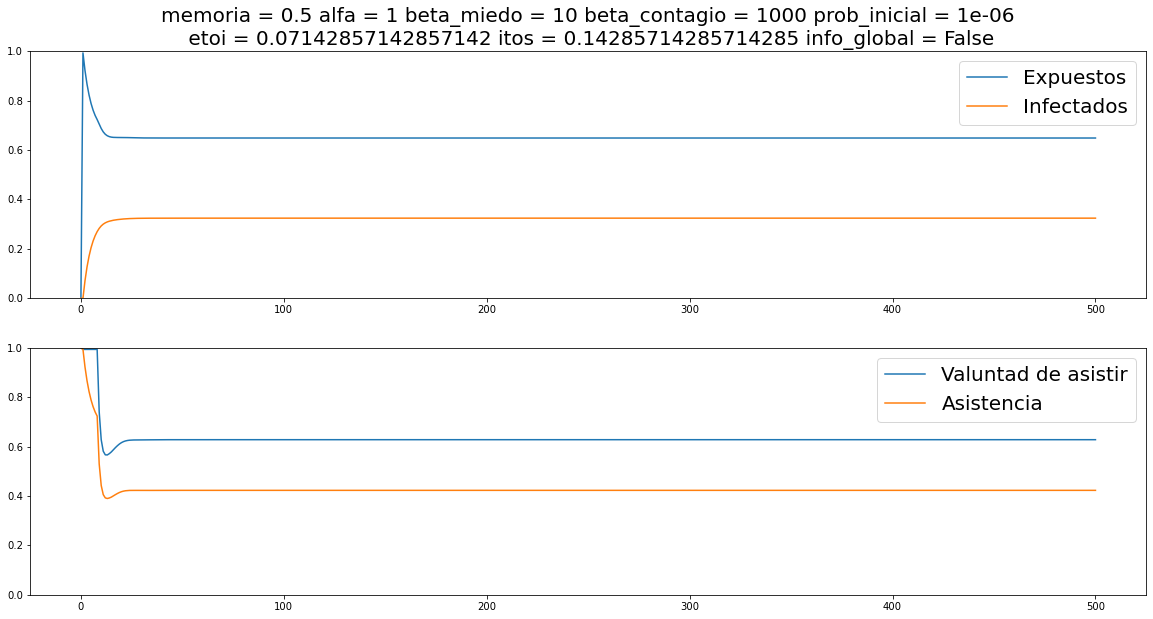

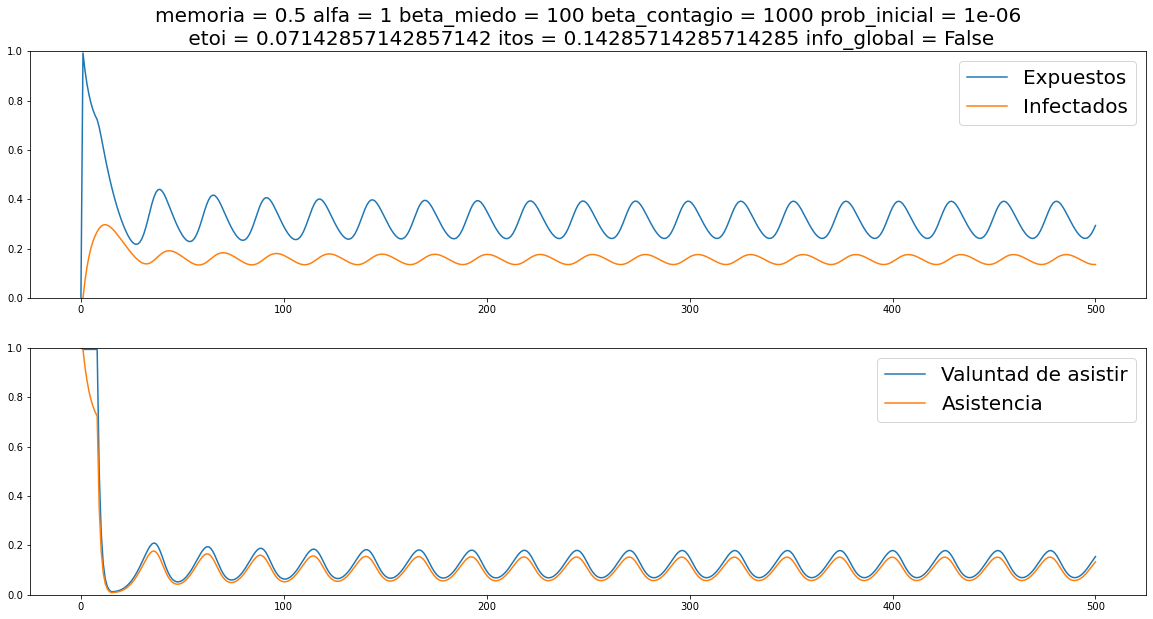

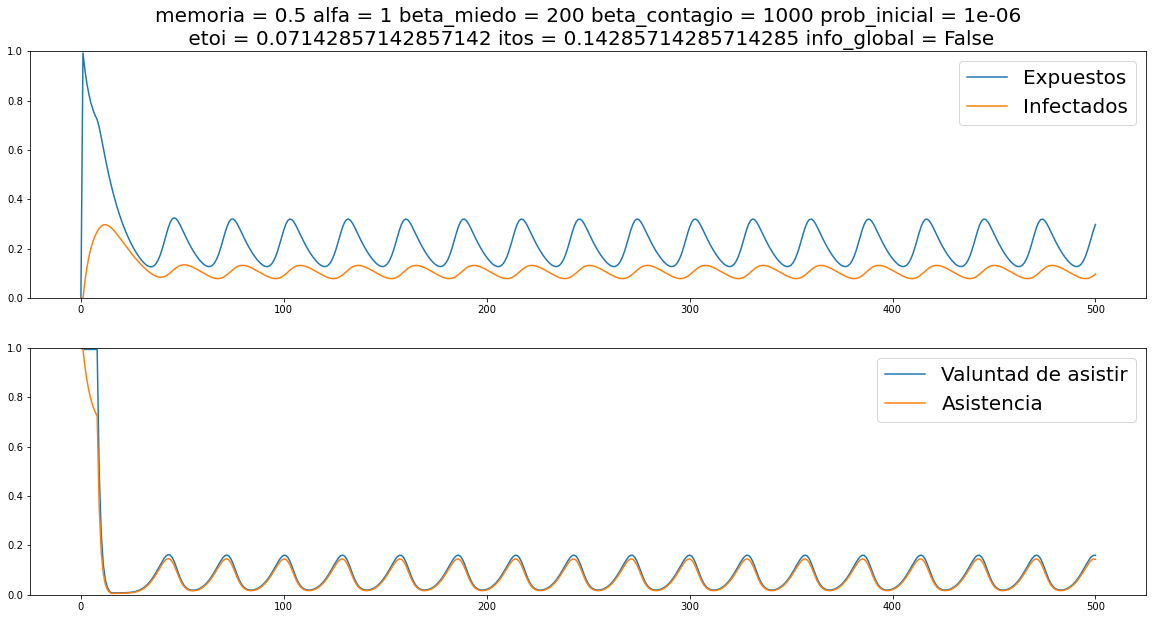

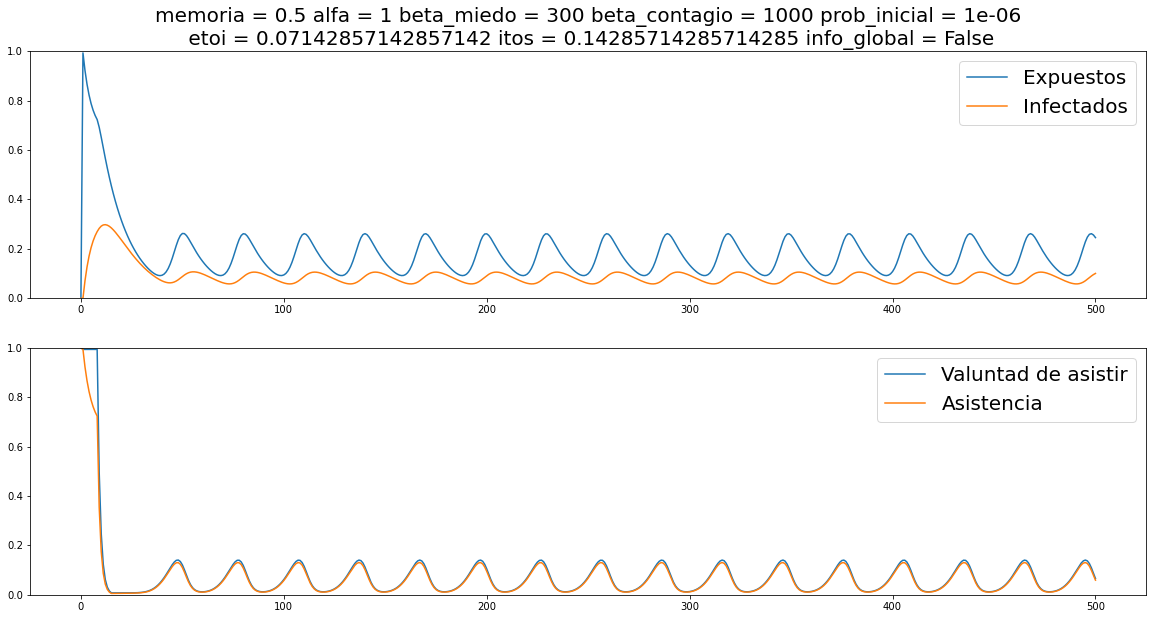

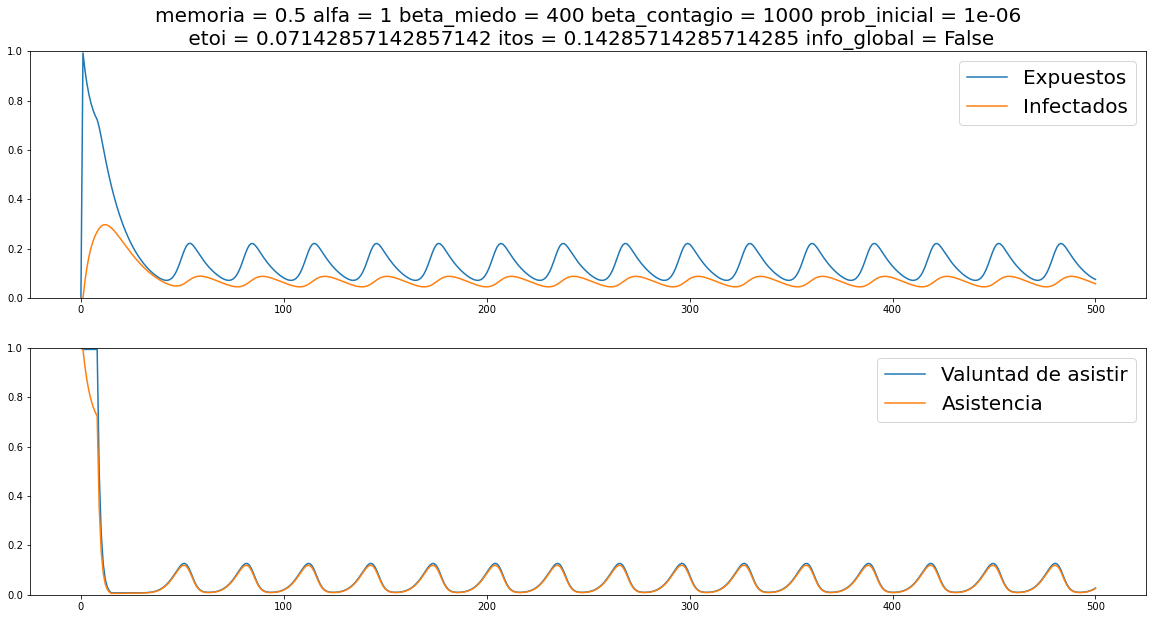

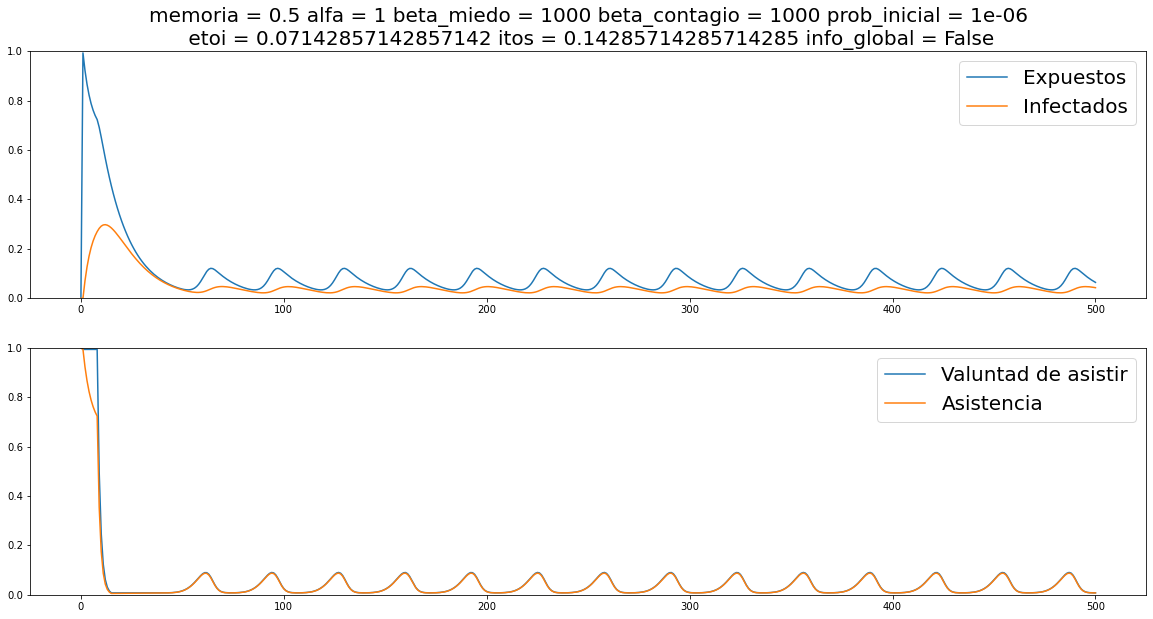

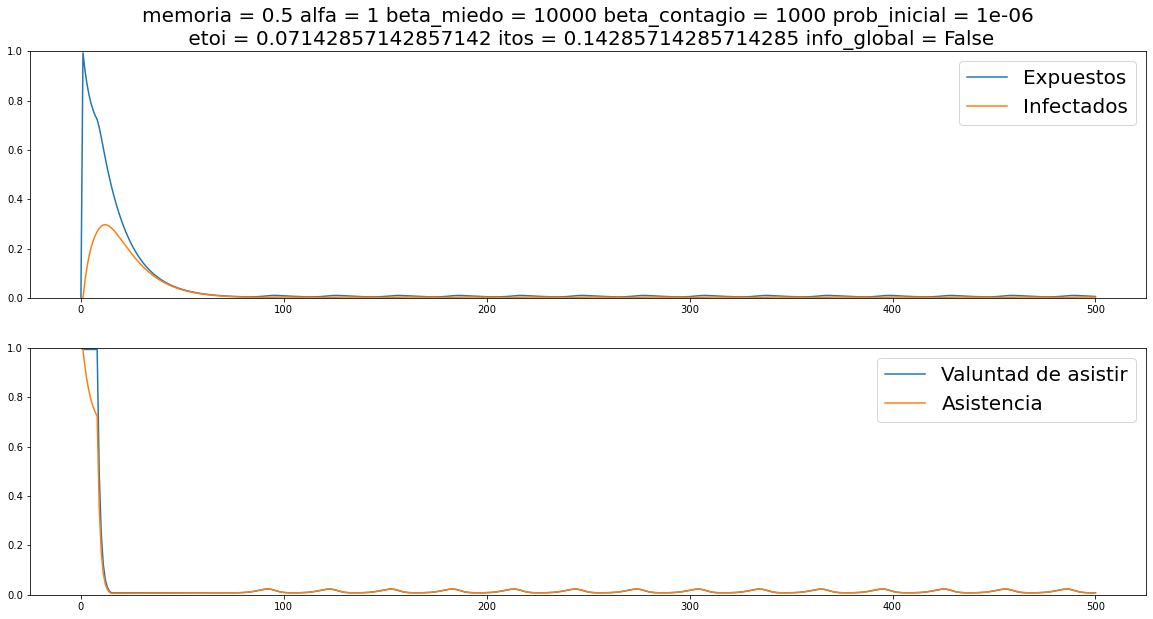

In [74]:
for beta_miedo in [10, 100, 200, 300, 400, 1000, 10000]:
    Informar(0.5, 1,beta_miedo, 1000, probs, prob_inicial, etoi, itos, False)